<h1 style="text-align:center;color:green;font-size:29px;font-family:ALGERIAN;border:solid">Projet Python pour la data science</h1>

<h1 style="text-align:center;color:red;font-size:28px;font-family:times">Ecole Nationale de la Statistique et de l'Administration Economique (ENSAE)</h1><br>
<center><img src="ENSAE.png" width="100" ></center>

 <center><h2 style="text-align:center;color:blue;font-size:27px;font-family:times"> Recherche des pays potentiels en investissement dans l'éducation </h2></center>
 
 
 --------------------------------------------------------------------------------------------
 
 <div style="display:flex;text-align:justify">
    
<ul style="text-align:justify;font-family:times;font-size:15px;list-style-type:circle; width:70%"> 
<span style="font-weight:bold">Réalisé par: </span> 
    <ul style="text-align:justify;font-family:times;font-size:15px;list-style-type:circle"> 
        <li>TIENDREBEOGO Mahamadou</li>
        <li>SARE GNANISSO</li>                                      
        <li>Channdeth SOK</li>     
     </ul>
    <span style="font-style: italic;color:blue;font-size:13px">Eléves Ingénieurs 2A de l'ENSAE IP Paris</span>
</ul>
 
<ul style="text-align:justify;font-family:times;font-size:15px;list-style-type:none;width:39%"> 
 <li style="font-weight:bold">Sous la supervision de:</li> 
 <li>Mme ANTUNEZ Kim </li>    
      <span style="font-style: italic;color:blue;font-size:13px">Enseignante à l'ENSAE</span>
</ul>
    
</div>

# <center><font color="violet"> Introduction </font>      </center> 
L'une des étapes importantes dans le processus d'investissement de toute entreprise est l'identification des marchés potentiels suceptibles de générer des retours sur investissement positif. Toute entreprise avant de se lancer dans un marché se doit d'étudier ce marché afin de déceller les opportunités présentes.
Dans le cadre d'un investissement dans le domaine éducatif sur le plan international, il sied de savoir:.
- Quels sont les pays avec un fort potentiel éducatif?
- Dans quels pays une telle entreprise doit-elle opérer en priorité ?

Telles sont les questions fondamentales que nous allons resoudre dans notre travail. Il consiste à partir des données sur l'éducation de la banque mondiale méner une analyse afin de guider une entreprise dans son programme principalement d'expansion.
- l’Analyse exploratoire pour juger de la pertinence des données ( Validation de la qualité de ce jeu de données)
- Description des informations contenues dans le jeu de données
- Sélection des informations qui semblent pertinentes pour répondre à la problématique
- L'Analyse Statistiaque afin d'identifier les pays potentiels ( l'analyse en composante principale: ACP,...)
  
  
  
# <center><font color="violet">  Données </font></center>
  La base de données est tirée du site de la banque mondiale et renseigne sur quelques indicateurs des differents pays du monde. Elle nécéssite une analyse préalable.

 # <center><font color="violet">  Importation des librairies nécessaires </font></center>

In [173]:
%matplotlib inline
import re
from os import path, getenv, environ
from typing import Dict

import folium
import matplotlib.pyplot as plt
import missingno as msno
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import plotly.express as px
import scipy
import scipy.stats as stats
import seaborn as sns
from sklearn import set_config
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


set_config(display="diagram", print_changed_only=False)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


 ### <center><font color="violet">  Chargement de la base et analyse préliminaire </font></center>

In [9]:
# Recupération de la localisation des fichiers pour faciliter le travail
ROOT_DIR = path.dirname(path.realpath("__file__"))

ROOT_DIR

'C:\\Users\\Administrateur\\OneDrive\\ENSAE-PARIS\\Python 2022'

In [11]:
# Importation de la base de données  avec la fonction path.join qui prend en argument la localisation
# et le fichier des données
filepath = path.join(ROOT_DIR,"data", "bases.csv")
# ce fichier recuperé  sera affecté à la varaible data et le séparateur est point virgule.
data = pd.read_csv(filepath, sep=";")
# Utilisation de shape pour afficher la taille( nombres de ligne, nombre de colonnes) de data
print("The data shape is: {shape}".format(shape=data.shape))

The data shape is: (2904, 30)


 Ainsi la base comporte 2904 observations(lignes) et 30 colonnes ( variables)

In [12]:
# Appelation de la fonction head pour afficher les premières lignes de data
data.head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                                                    Indicator Name  \
0                Expenditure on education as % of total government expenditure (%)   
1                              GDP per capita, PPP (constant 2011 international $)   
2  Government expenditure on post-secondary non-tertiary education as % of GDP (%)   
3                    Government expenditure on secondary education as % of GDP (%)   
4                     Government expenditure on tertiary education as % of GDP (%)   

      Indicator Code         2020  Short Name  Table Name   Long Name  \
0  SE.XPD.TOTL.GB.ZS          NaN  Arab World  Arab World  Arab World   
1  NY.GDP.PCAP.PP.KD  11450.86079  Arab World  Arab World  Arab World   
2   UIS.XGDP.4.FSGOV          NaN  Arab World  Arab World  Arab World   
3  UIS.XGDP.23.FSGOV          NaN  Arab World  Arab World  Arab World   
4  UIS.XGDP.56.FSGOV          NaN  Arab World  Arab World  Arab World   

  2-alpha code Currency Unit  \
0           1A           NaN   
1           1A           NaN   
2           1A           NaN   
3           1A           NaN   
4           1A           NaN   

                                                                           Special Notes  \
0  Arab World aggregate. Arab World is composed of members of the League of Arab States.   
1  Arab World aggregate. Arab World is composed of members of the League of Arab States.   
2  Arab World aggregate. Arab World is composed of members of the League of Arab States.   
3  Arab World aggregate. Arab World is composed of members of the League of Arab States.   
4  Arab World aggregate. Arab World is composed of members of the League of Arab States.   

  Region Income Group WB-2 code System of National Accounts  \
0    NaN          NaN        1A                         NaN   
1    NaN          NaN        1A                         NaN   
2    NaN          NaN        1A                         NaN   
3    NaN          NaN        1A                         NaN   
4    NaN          NaN        1A                         NaN   

  Alternative conversion factor PPP survey year        Series Code  \
0                           NaN             NaN  SE.XPD.TOTL.GB.ZS   
1                           NaN             NaN  NY.GDP.PCAP.PP.KD   
2                           NaN             NaN   UIS.XGDP.4.FSGOV   
3                           NaN             NaN  UIS.XGDP.23.FSGOV   
4                           NaN             NaN  UIS.XGDP.56.FSGOV   

                                             Topic Short definition  \
0                                     Expenditures              NaN   
1  Economic Policy & Debt: Purchasing power parity              NaN   
2                                     Expenditures              NaN   
3                                     Expenditures              NaN   
4                                     Expenditures              NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

<center><h1 style="text-align:left;color:violet;font-size:25px;font-family:ALGERIAN"> PREPROCCESSING</h1></center>


<p style="text-align:justify;font-family:times;font-size:15px">
Dans cette partie, il sera question d'effectuer une analyse globale de notre jeu de données. Nous allons nous interesser particulierement à:
    <li style="text-align:justify;font-family:times;font-size:15px"><span style="font-weight:bold;font-family:times">L'analyse des doublons</span> qui consiste à voir si nos individus existent de manière unique dans notre base.</li>
    <li style="text-align:justify;font-family:times;font-size:15px"><span style="font-weight:bold;font-family:times">L'analyse des valeurs manquantes</span> qui consiste à voir s'il n'existe pas dans notre jeu de données des lignes ou des colonnes vides.</li>
    <li style="text-align:justify;font-family:times;font-size:15px"><span style="font-weight:bold;font-family:times"> La visualisation de nos variables</span> afin d'observer les interactions qui pourraient exister entre les variables et d'identifier les variables pertinentes </li>
      <li style="text-align:justify;font-family:times;font-size:15px"><span style="font-weight:bold;font-family:times"> Le resumé statistique de nos variables</span> </li>
       <li style="text-align:justify;font-family:times;font-size:15px"><span style="font-weight:bold;font-family:times"> La création de variables pertinentes</span> </li>
    
</p>

La base de données  contient plusieurs variables. Nous avons entre autres la variable indicator Name qui indique le pays correspondant, une variable qui renseigne sur les indicateurs. Ainsi pour chaque pays on donne un certain nombre d'indicateurs tels que l'utilisation de l'internet, les dépenses du gouvernement dans l'éducation,le PIB par tete. La valeur de l'indicateur est localisée dans la variable 2020. Ces données concernent l'année 2020. Par ailleurs, la base contient des données manquantes.

In [13]:
# Affichage des informations sur les variables( les types: float, object, character,...) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country Name                   2904 non-null   object 
 1   Country Code                   2904 non-null   object 
 2   Indicator Name                 2904 non-null   object 
 3   Indicator Code                 2904 non-null   object 
 4   2020                           1588 non-null   float64
 5   Short Name                     2892 non-null   object 
 6   Table Name                     2892 non-null   object 
 7   Long Name                      2892 non-null   object 
 8   2-alpha code                   2856 non-null   object 
 9   Currency Unit                  2580 non-null   object 
 10  Special Notes                  1740 non-null   object 
 11  Region                         2568 non-null   object 
 12  Income Group                   2568 non-null   o

In [14]:
# Stat descriptive des variables pour avoir une vue globale des variables
data.describe(include="all")

Country Name Country Code  \
count                2904         2904   
unique                242          242   
top     Brunei Darussalam          TUN   
freq                   12           12   
mean                  NaN          NaN   
std                   NaN          NaN   
min                   NaN          NaN   
25%                   NaN          NaN   
50%                   NaN          NaN   
75%                   NaN          NaN   
max                   NaN          NaN   

                                                Indicator Name  \
count                                                     2904   
unique                                                      12   
top     Gross enrolment ratio, upper secondary, both sexes (%)   
freq                                                       242   
mean                                                       NaN   
std                                                        NaN   
min                                                        NaN   
25%                                                        NaN   
50%                                                        NaN   
75%                                                        NaN   
max                                                        NaN   

          Indicator Code          2020 Short Name         Table Name  \
count               2904  1.588000e+03       2892               2892   
unique                12           NaN        241                241   
top     UIS.XGDP.4.FSGOV           NaN  Singapore  Brunei Darussalam   
freq                 242           NaN         12                 12   
mean                 NaN  2.592391e+07        NaN                NaN   
std                  NaN  2.664621e+08        NaN                NaN   
min                  NaN  0.000000e+00        NaN                NaN   
25%                  NaN  6.537010e+00        NaN                NaN   
50%                  NaN  5.044388e+01        NaN                NaN   
75%                  NaN  2.746509e+03        NaN                NaN   
max                  NaN  6.118075e+09        NaN                NaN   

                Long Name 2-alpha code Currency Unit  \
count                2892         2856          2580   
unique                241          238           152   
top     Republic of Congo           AE          Euro   
freq                   12           12           276   
mean                  NaN          NaN           NaN   
std                   NaN          NaN           NaN   
min                   NaN          NaN           NaN   
25%                   NaN          NaN           NaN   
50%                   NaN          NaN           NaN   
75%                   NaN          NaN           NaN   
max                   NaN          NaN           NaN   

                                                                                                                                                   Special Notes  \
count                                                                                                                                                       1740   
unique                                                                                                                                                       131   
top     April 2012 database update: Based on official government statistics, national accounts data were revised for 2000 onward; the base year changed to 2006.   
freq                                                                                                                                                          72   
mean                                                                                                                                                         NaN   
std                                                                                                                                                          NaN   
min                          

In [15]:
# Fonction pour calculer les pourcentage des données manquantes par colonne (variables)
def missing_values_table(df):
        # Total missing values, on pouvait utiliser isna() aussi
        mis_val = df.isnull().sum()
        
        # Pourcentage des valeurs manquantes
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Tableau synthetique
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Dans la base de donnée nous avons " + str(df.shape[1]) + " columns.\n"      
            "il y a  " + str(mis_val_table_ren_columns.shape[0]) +
              " colonnes contenant des données manquantes.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [16]:
# Fonction resume statistique 
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    summary['Third Value'] = df.iloc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

def cross_heatmap(df, cols, normalize=False, values=None, aggfunc=None):
    temp = cols
    cm = sns.light_palette("green", as_cmap=True)
    return pd.crosstab(df[temp[0]], df[temp[1]], 
                       normalize=normalize, values=values, aggfunc=aggfunc).style.background_gradient(cmap = cm)



In [17]:
missing_values_table(data)

Dans la base de donnée nous avons 30 columns.
il y a  26 colonnes contenant des données manquantes.


Missing Values  % of Total Values
Notes from original source               2904              100.0
Unit of measure                          2904              100.0
Short definition                         2662               91.7
Base Period                              2662               91.7
Other notes                              2662               91.7
General comments                         2420               83.3
Limitations and exceptions               2420               83.3
Alternative conversion factor            2340               80.6
Periodicity                              2178               75.0
Aggregation method                       2178               75.0
2020                                     1316               45.3
PPP survey year                          1164               40.1
Special Notes                            1164               40.1
Region                                    336               11.6
Income Group                              336               11.6
System of National Accounts               324               11.2
Currency Unit                             324               11.2
Series Code                               242                8.3
Long definition                           242                8.3
Topic                                     242                8.3
Source                                    242                8.3
2-alpha code                               48                1.7
WB-2 code                                  24                0.8
Short Name                                 12                0.4
Long Name                                  12                0.4
Table Name                                 12                0.4

Bien que certaines variables ne nous interesseront pas ou n'ont pas d'informations pertinentes, il faut tout de meme noter la presence de  beaucoups de missing values. 

Par ailleurs les noms des variabales contiennent des caracteres pas tres comode dans l'usage, il serait necessaire de les renommer pour faciliter la manipulation.

In [18]:
## Recherche de doublons
data.duplicated().sum()

0

In [19]:
# Renommer les variables contenant des espaces avec la fonction replace ( espace devient tiret de huit)
# Rename columns: replace space & - by _
data.columns = data.columns.str.lower().str.replace('[-\s]', '_', regex=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country_name                   2904 non-null   object 
 1   country_code                   2904 non-null   object 
 2   indicator_name                 2904 non-null   object 
 3   indicator_code                 2904 non-null   object 
 4   2020                           1588 non-null   float64
 5   short_name                     2892 non-null   object 
 6   table_name                     2892 non-null   object 
 7   long_name                      2892 non-null   object 
 8   2_alpha_code                   2856 non-null   object 
 9   currency_unit                  2580 non-null   object 
 10  special_notes                  1740 non-null   object 
 11  region                         2568 non-null   object 
 12  income_group                   2568 non-null   o

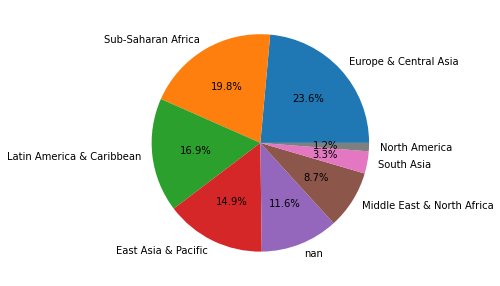

In [20]:
# Vue globale sur les régions représentées à l'aide d'un diagramme circulaire( chaque région avec son nombre de pays: en pourcentage)
(data.region
 .value_counts(dropna=False)
 .plot(kind="pie", autopct='%.1f%%', legend = False, fontsize=10,
      xlabel="", ylabel="", table=False, figsize=(5, 5))
);

Toutes les zones sont représentées. Mais il existe une région nan qui contient 11,6% de pays. Ce sont des erreurs d'observations cela veut dire que ces pays n'ont pas de régions ce qui est contradictoire. Nous allons ainsi supprimer ces pays sans region.

In [21]:
# Affichage des pays correspondant à des régions manquantes à l'aide de la fonction loc. Cette fonction nous affiche les pays sans région
data.loc[data.region.isnull(), "country_name"].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'British Virgin Islands',
       'Gibraltar', 'Nauru'], dtype=object)

L'on constate que certains sont des zone et d'autre des pays.

In [22]:
# Suppression de tous les pays sans region( avec région manquante)
data = data.loc[data.region.notnull()]

In [23]:
missing_values_table(data)

Dans la base de donnée nous avons 30 columns.
il y a  19 colonnes contenant des données manquantes.


Missing Values  % of Total Values
notes_from_original_source               2568              100.0
unit_of_measure                          2568              100.0
other_notes                              2354               91.7
short_definition                         2354               91.7
base_period                              2354               91.7
general_comments                         2140               83.3
limitations_and_exceptions               2140               83.3
alternative_conversion_factor            2004               78.0
aggregation_method                       1926               75.0
periodicity                              1926               75.0
2020                                     1132               44.1
special_notes                            1128               43.9
ppp_survey_year                           828               32.2
long_definition                           214                8.3
topic                                     214                8.3
series_code                               214                8.3
source                                    214                8.3
2_alpha_code                               36                1.4
wb_2_code                                  12                0.5

In [24]:
# retouver les colonnes qui dépassent 90 %
missing_df = missing_values_table(data);
missing_columns= list(missing_df[missing_df['% of Total Values'] > 90].index)
print('Nous allons supprimer les %d colonnes contenant plus de 90 pour cent de valeurs manquantes.' % len(missing_columns))

Dans la base de donnée nous avons 30 columns.
il y a  19 colonnes contenant des données manquantes.
Nous allons supprimer les 5 colonnes contenant plus de 90 pour cent de valeurs manquantes.


## Le package Missingno

Missingno est une bibliothèque Python qui permet de comprendre la distribution des valeurs manquantes grâce à des visualisations informatives. Ces visualisations peuvent prendre la forme de heat_map ou de diagrammes à bar. Avec cette bibliothèque, il est possible d'observer où les valeurs manquantes sont apparues et de vérifier la corrélation des colonnes contenant les valeurs manquantes avec la colonne cible. Les valeurs manquantes sont mieux traitées une fois que l'ensemble de données est entièrement exploré. Mettons maintenant cette bibliothèque en œuvre et découvrons comment elle nous aide à mieux prétraiter les données. 

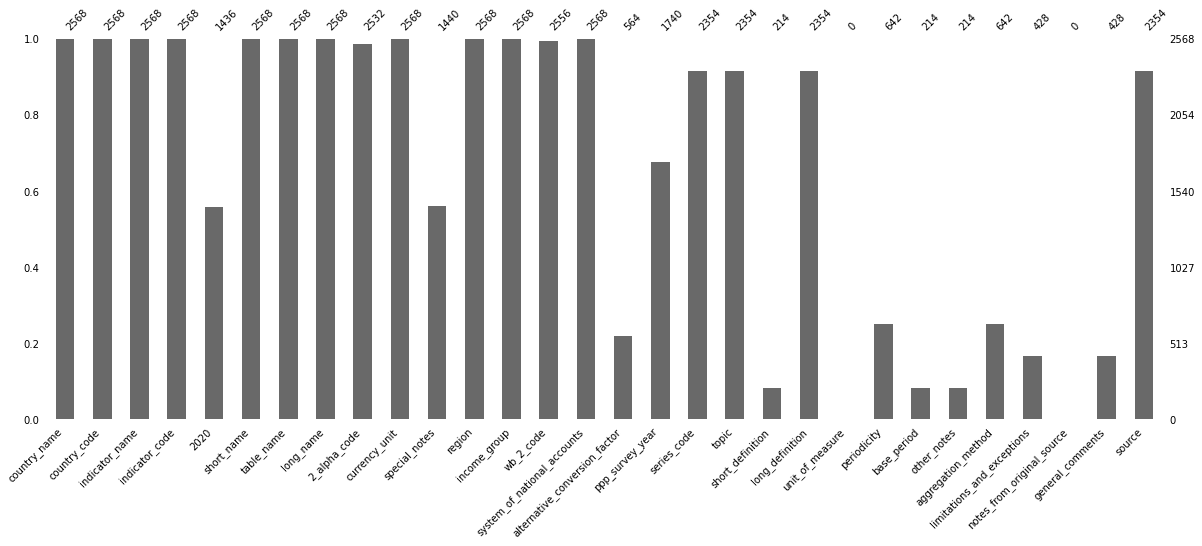

In [25]:
# Observation de la distribution des valeurs manquantes par colonne (histogramme)
msno.bar(data, figsize=(20, 7), fontsize=10);

Les variables ayant un bar court ont beaucoups de missings values. Mais la plupart d'entre elle concerne des metadonnées.

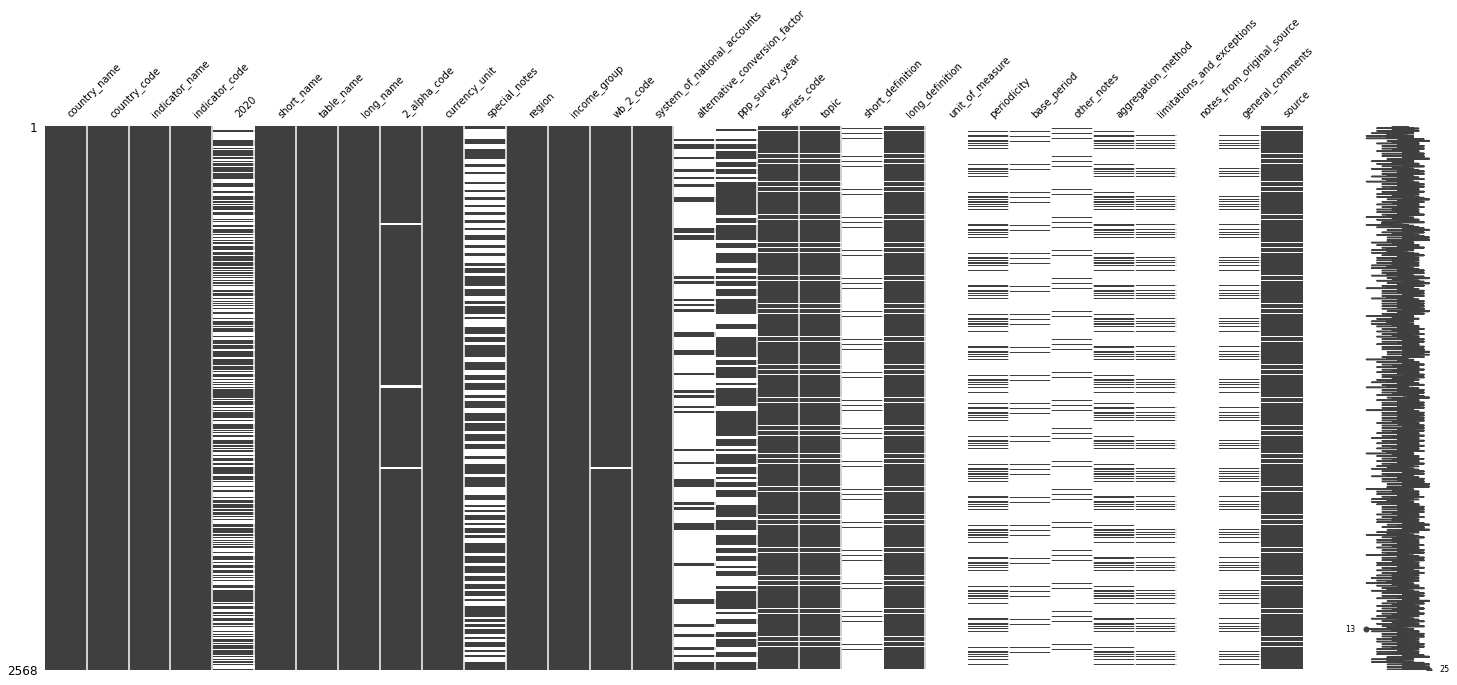

In [26]:
#Distribution des valeurs manquantes par la fonction matrix: elle nous indique les positions des valeurs manquantes
msno.matrix(data, figsize=(25, 10), fontsize=10);

Le heat map permet d'observer les positions des valeurs manquantes. Ainsi certaines variables prennent simultanement des missings values.

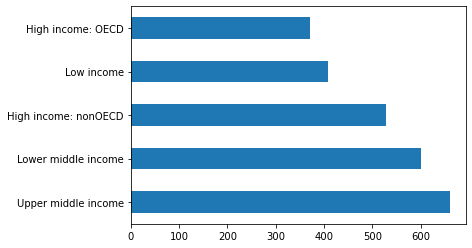

In [27]:
### Fréquence de la variable income group (histogramme par groupe de revenu)
data.income_group.value_counts().plot(kind="barh");

La modalite Upper middle income est la plus frequente, autrement il ya plus de pays avec un revenu moyen legerement eleve. Nous recherchons les pays ou le revenu est assez eleve susceptible de nous procurer un retour sur investissement positif. Pour cela les pays avec revenu faible peuvent etre ecartes.

Il s'agit des pays tels que Afghanistan,Armenia, Bangladesh entre autres.

In [28]:
# filtrer low income group: Ce sont des pays à RNB(Revenu national Brut) par habitant inferieur ou égal à 1000 dollars selon la 
# banque mondiale
# Nous allons recupérer ces pays et les écarter de l'analyse car ils n'ont pas de fort potentiel éducatif
LOW_INCOME_FILTER = data.income_group.str.contains("low", regex=True, flags=re.I, na=False)
data.loc[LOW_INCOME_FILTER, "country_name"].unique()

array(['Afghanistan', 'Armenia', 'Bangladesh', 'Benin', 'Bhutan',
       'Bolivia', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Djibouti',
       'Egypt, Arab Rep.', 'El Salvador', 'Eritrea', 'Ethiopia',
       'Gambia, The', 'Georgia', 'Ghana', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India',
       'Indonesia', 'Kenya', 'Kiribati', 'Korea, Dem. People’s Rep.',
       'Kosovo', 'Kyrgyz Republic', 'Lao PDR', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Morocco',
       'Mozambique', 'Myanmar', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria',
       'Pakistan', 'Papua New Guinea', 'Paraguay', 'Philippines',
       'Rwanda', 'Samoa', 'Sao Tome and Principe', 'Senegal',
       'Sierra Leone', 'Solomon Islands', 'Somalia', 'South Sudan',
    

In [29]:
# Ne garder que les pays n'ayant pas de faible RNB par habitant
data = data.loc[~LOW_INCOME_FILTER]
print(f"data shape: {data.shape}")

data shape: (1560, 30)


In [30]:
missing_values_table(data)

Dans la base de donnée nous avons 30 columns.
il y a  19 colonnes contenant des données manquantes.


Missing Values  % of Total Values
notes_from_original_source               1560              100.0
unit_of_measure                          1560              100.0
other_notes                              1430               91.7
short_definition                         1430               91.7
base_period                              1430               91.7
alternative_conversion_factor            1320               84.6
general_comments                         1300               83.3
limitations_and_exceptions               1300               83.3
aggregation_method                       1170               75.0
periodicity                              1170               75.0
special_notes                             720               46.2
2020                                      675               43.3
ppp_survey_year                           564               36.2
long_definition                           130                8.3
topic                                     130                8.3
series_code                               130                8.3
source                                    130                8.3
2_alpha_code                               24                1.5
wb_2_code                                  12                0.8

Interressons nous maintenant aux indicateurs disponible dans la base.

In [31]:
#Ce sont les indicateurs qui nous serviront dans la suite, pour notre analyse
#Affichage de la liste des indicateurs( noms et code par ordre croissant de code)
(data
 .loc[:, ["indicator_name", "indicator_code"]] # les noms et code des indicateurs
 .drop_duplicates()
 .sort_values(by="indicator_code")
 .reset_index(drop=True)
)

indicator_name  \
0                                                                                      Internet users (per 100 people)   
1                                                                  GDP per capita, PPP (constant 2011 international $)   
2                                                               Gross enrolment ratio, upper secondary, both sexes (%)   
3                                                                      Gross enrolment ratio, tertiary, both sexes (%)   
4                                                    Expenditure on education as % of total government expenditure (%)   
5                                                                                  Population, ages 15-64 (% of total)   
6                                                                                                    Population, total   
7   UIS: Percentage of population age 25+ with at least completed upper secondary education (ISCED 3 or higher). Total   
8                                                   Gross enrolment ratio, post-secondary non-tertiary, both sexes (%)   
9                                                        Government expenditure on secondary education as % of GDP (%)   
10                                     Government expenditure on post-secondary non-tertiary education as % of GDP (%)   
11                                                        Government expenditure on tertiary education as % of GDP (%)   

        indicator_code  
0       IT.NET.USER.P2  
1    NY.GDP.PCAP.PP.KD  
2       SE.SEC.ENRR.UP  
3          SE.TER.ENRR  
4    SE.XPD.TOTL.GB.ZS  
5    SP.POP.1564.TO.ZS  
6          SP.POP.TOTL  
7   UIS.EA.3T6.AG25T99  
8            UIS.GER.4  
9    UIS.XGDP.23.FSGOV  
10    UIS.XGDP.4.FSGOV  
11   UIS.XGDP.56.FSGOV

Nous avons entre autre l'utilisation d'internet, le pib par habitant (PPP 2011), la ratio  d'enrollement, les depenses du gouvernement, etc.

Nous allons decrire le nombre d'indicateurs par pays.

In [32]:
# description du nombre d'indicateurs par pays
df_nb_indicators_by_country = data.groupby(["region", "country_name", "country_code"],
                                           as_index=False, dropna=False)["2020"].count()

df_nb_indicators_by_country.head()

region       country_name country_code  2020
0  East Asia & Pacific     American Samoa          ASM     1
1  East Asia & Pacific          Australia          AUS    11
2  East Asia & Pacific  Brunei Darussalam          BRN     8
3  East Asia & Pacific              China          CHN     7
4  East Asia & Pacific               Fiji          FJI     8

Par exemple Il ya des pays qui n'ont qu'un seul indicateur. Il ne sera pas interressant de faire l'analyse sur un seul indicateur.

Il semble que la plupart des pays ont entre 6 et 8 indicateurs.

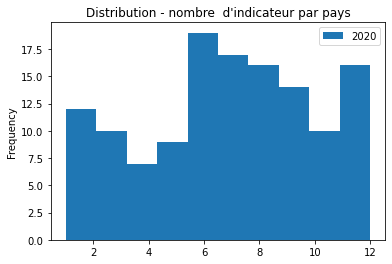

In [33]:
df_nb_indicators_by_country.plot(kind="hist", title="Distribution - nombre  d'indicateur par pays");

En utilisant les code des pays nous pouvons representer le maps des pays selon le nombre d'indicateurs.
Ainsi en jaune les pays (la France par exemple) qui ont nombre d'indicateurs eleves et en bleu ceux ayant un nombre faible d'indicateurs.

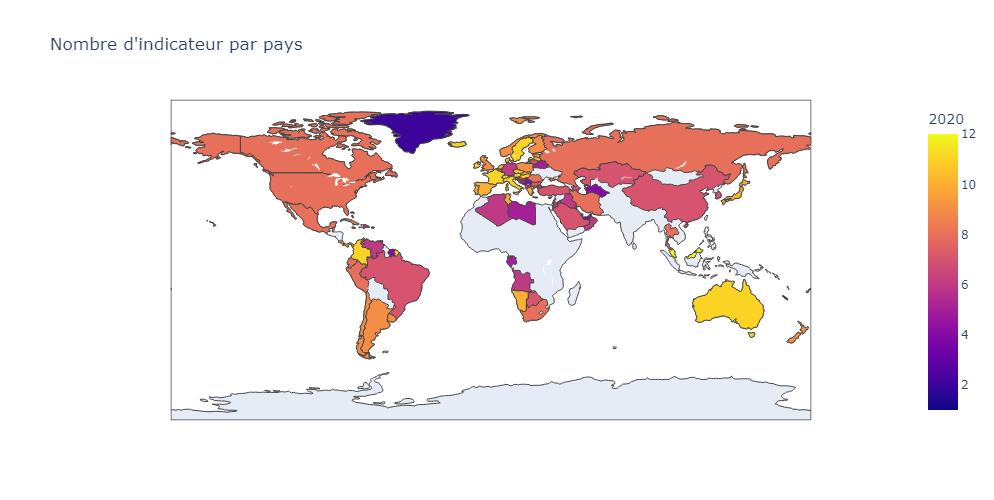

In [34]:
# La carte des pays selon le nombre d'indicateurs disponible
px.choropleth(df_nb_indicators_by_country,               
              locations="country_code",   # Cette valeur est interprétée en fonction du mode de localisation et convertie en longitude/latitude
              color="2020",
              # hover_name="country_name",
              hover_data=["region", "country_name", "country_code"],
              animation_frame=None,
              height=500,
              width=None,
              title="Nombre d'indicateur par pays",
              #range_color=(0, 12),
)

In [35]:
# On va utiliser le quantile d'ordre 1(25%) du nombre d'indicateur disponoble pour filtrer les pays

quantile1 = df_nb_indicators_by_country.quantile(.25).values[0]
# countries that have less than 5 indicators, ces pays ne contiennent pas suffisament d'indicateurs pour l'analyse
moins_quantile1_indicateurs = df_nb_indicators_by_country.loc[df_nb_indicators_by_country["2020"] <= quantile1,
                                                                    "country_name"]
display(moins_quantile1_indicateurs)

data = data.loc[~data.country_name.isin(moins_quantile1_indicateurs)]

0                 American Samoa
5               French Polynesia
6                           Guam
7           Hong Kong SAR, China
12              Marshall Islands
13                 New Caledonia
15      Northern Mariana Islands
16                         Palau
17                     Singapore
20                        Tuvalu
22                       Andorra
25                       Belarus
27        Bosnia and Herzegovina
29               Channel Islands
35                 Faroe Islands
40                     Greenland
44                   Isle of Man
48                 Liechtenstein
52                        Monaco
53                    Montenegro
60                    San Marino
61                        Serbia
68                  Turkmenistan
77                Cayman Islands
82                       Curacao
83                      Dominica
86                       Grenada
91                   Puerto Rico
92     Sint Maarten (Dutch part)
95      St. Martin (French part)
97        

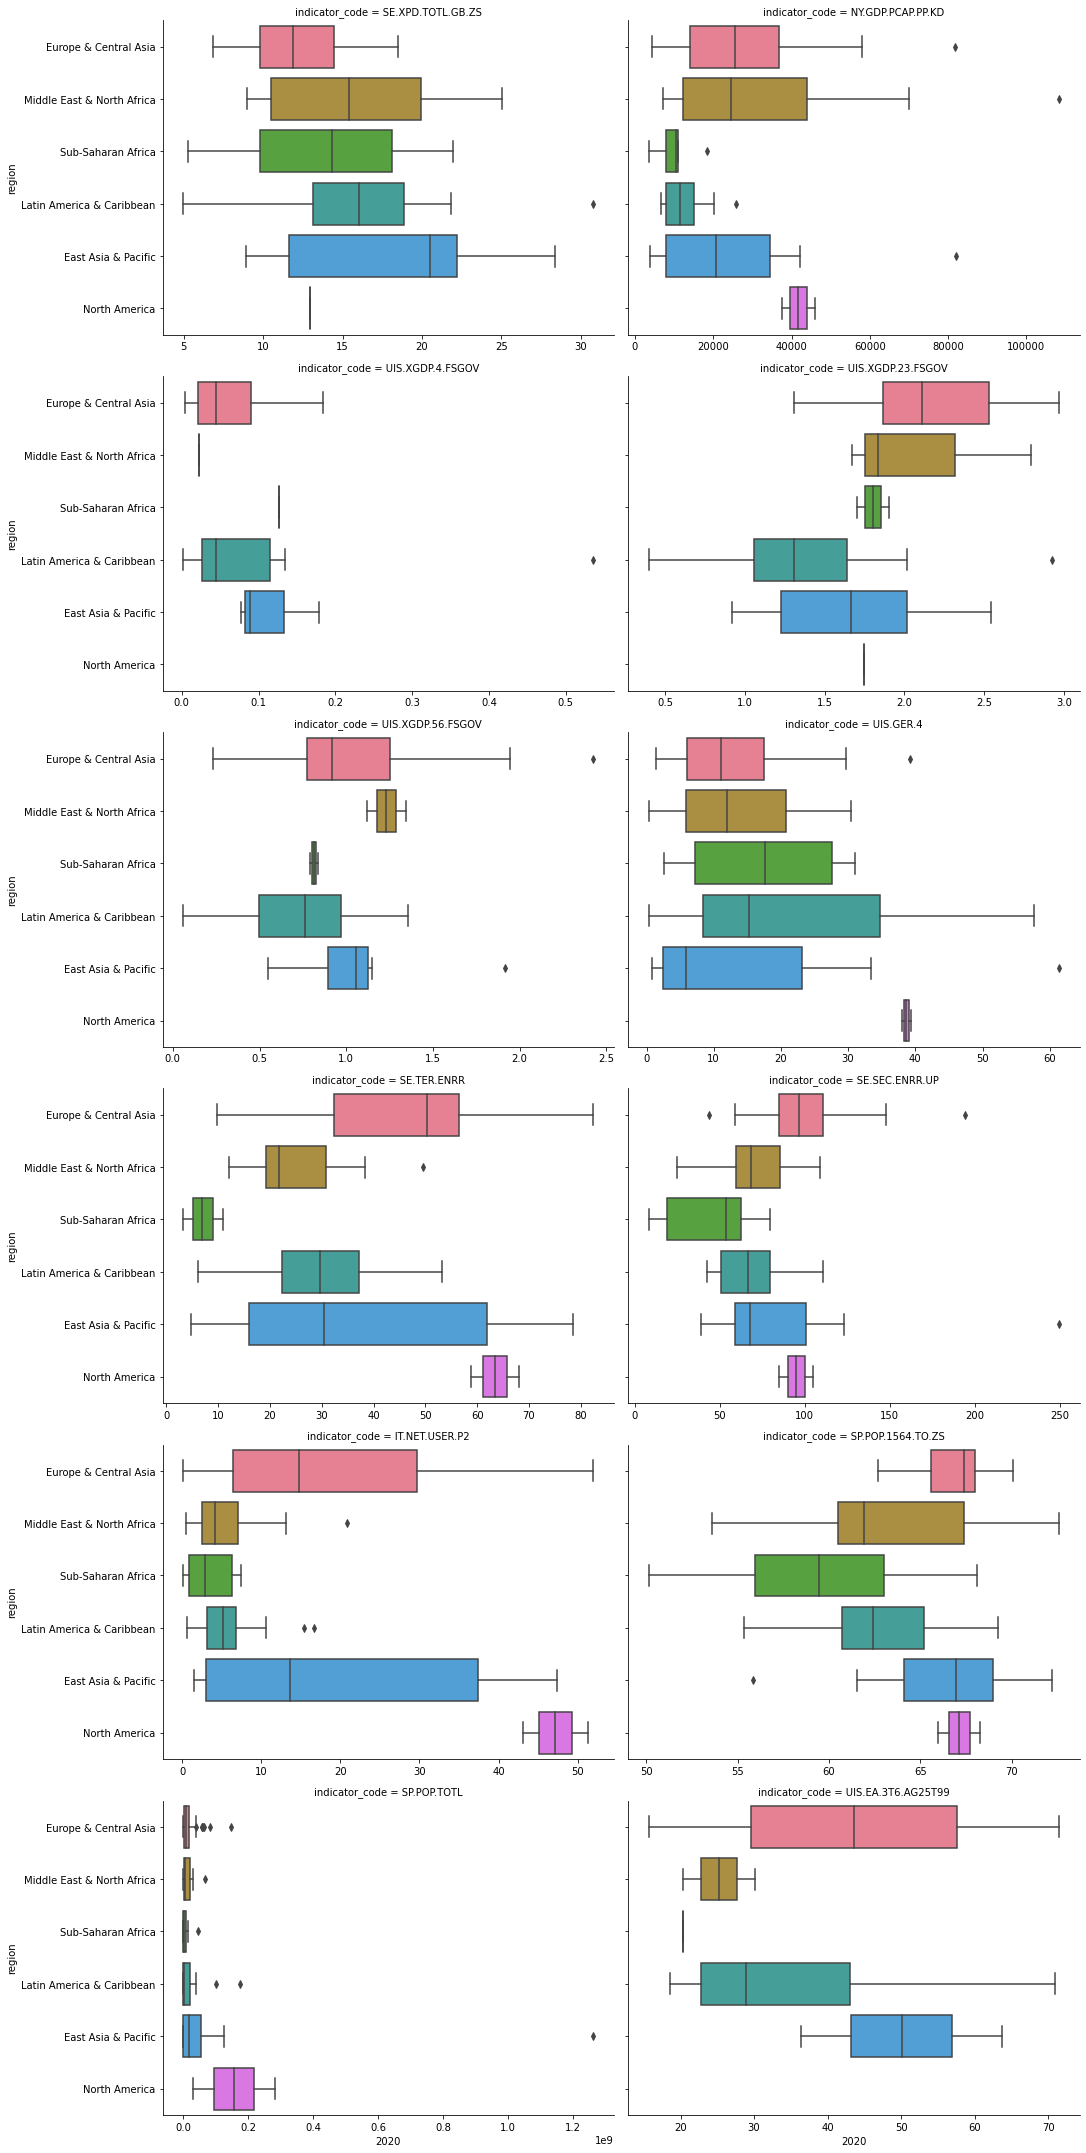

In [36]:
sns.catplot(data=data, y='region', x='2020', col='indicator_code',
            height=5, aspect=1.5, palette="husl", orient="h",
            col_wrap=2, kind="box", sharex=False, sharey=True);

In [37]:
# topn (n=10) of country by indicator: On a ainsi le top des 10 pays par indicateur
N = 10
df_country_by_indicator = (data
                           .groupby(['indicator_name'], as_index=True, dropna=False)
                           [['region', 'country_name', '2020']]
                           .apply(lambda x: x.nlargest(N, columns=['2020'], keep="all"))
                           .reset_index()
                           )

df_country_by_indicator

indicator_name  \
0                                                     Expenditure on education as % of total government expenditure (%)   
1                                                     Expenditure on education as % of total government expenditure (%)   
2                                                     Expenditure on education as % of total government expenditure (%)   
3                                                     Expenditure on education as % of total government expenditure (%)   
4                                                     Expenditure on education as % of total government expenditure (%)   
..                                                                                                                  ...   
115  UIS: Percentage of population age 25+ with at least completed upper secondary education (ISCED 3 or higher). Total   
116  UIS: Percentage of population age 25+ with at least completed upper secondary education (ISCED 3 or higher). Total   
117  UIS: Percentage of population age 25+ with at least completed upper secondary education (ISCED 3 or higher). Total   
118  UIS: Percentage of population age 25+ with at least completed upper secondary education (ISCED 3 or higher). Total   
119  UIS: Percentage of population age 25+ with at least completed upper secondary education (ISCED 3 or higher). Total   

     level_1                      region                    country_name  \
0       2496   Latin America & Caribbean  St. Vincent and the Grenadines   
1       2604         East Asia & Pacific                        Thailand   
2       2664  Middle East & North Africa                         Tunisia   
3       2640         East Asia & Pacific                           Tonga   
4       1932          Sub-Saharan Africa                         Namibia   
..       ...                         ...                             ...   
115     2291  Middle East & North Africa                    Saudi Arabia   
116      503   Latin America & Caribbean                        Barbados   
117     1787  Middle East & North Africa                           Malta   
118     1823          Sub-Saharan Africa                       Mauritius   
119     1835   Latin America & Caribbean                          Mexico   

          2020  
0    30.789200  
1    28.388599  
2    25.047310  
3    22.955860  
4    21.925060  
..         ...  
115  30.066601  
116  24.205730  
117  20.398439  
118  20.398439  
119  18.577311  

[120 rows x 5 columns]

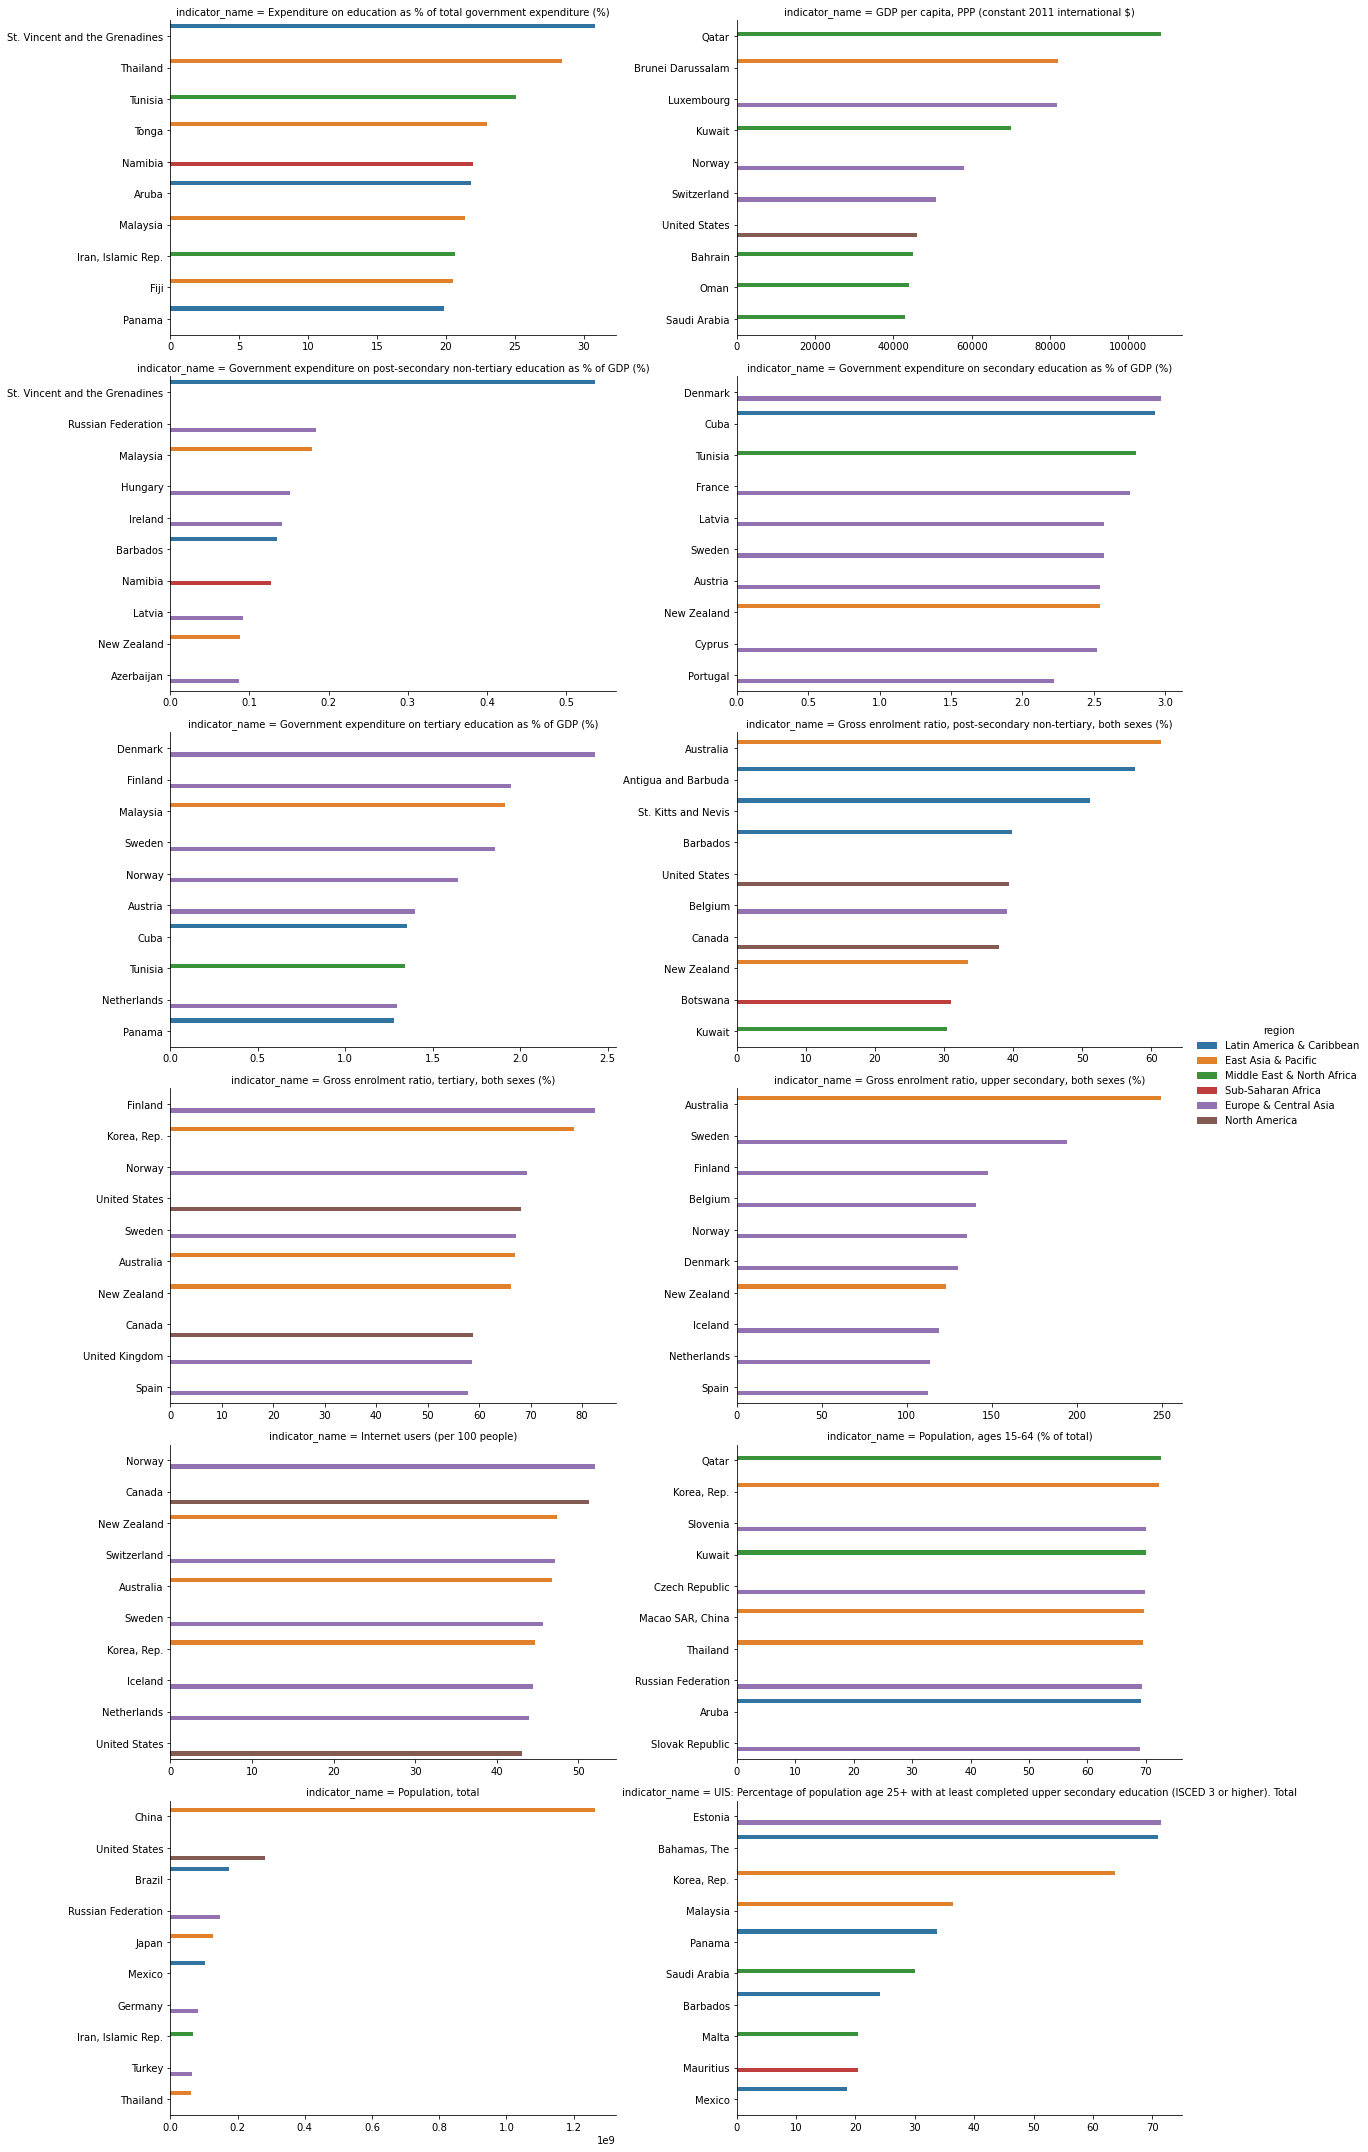

In [38]:
#Plot des pays dans le top10 Les couleurs indiquent les regions auxquelles appartiennent les pays et le bar la valeurs detenues par le pays
g = sns.catplot(data=df_country_by_indicator,
            y="country_name",
            x="2020",
            kind="bar",
            orient="h",
            height=5,
            aspect=1.7,
            hue="region",
            col="indicator_name",
            col_wrap=2,
            sharey=False,
            sharex=False,
           )
g.set_axis_labels("", "")

# Remarques
La disposition des variables ne permet pas d'implementer certaines methodes statistique car ce sont les indicateurs qui constituent nos variables danalyse.
Il faut donc que les indicateurs soient en colonne et les pays en ligne. Ainsi la commande pivot de la balise pandas sera utilisée. Elle fonctionne exactement comme la commande reshape sur stata. Ainsi nous obtenons une base qui nous renseigne pour chaque pays ou zone les différents indicateurs. La commande pivot nous a facilité ici la tache au lieu de procéder à des manipulation longues. Implicitement, nous allons éliminer plusieurs colonnes qui ne contenaient jusque là que des métadonnées(des informations sur les calcul des indicateurs).

In [39]:
# Create a spreadsheet-style pivot table as a DataFrame.
data_pivot = pd.pivot_table(data=data,
                            index=["region", "country_name", "country_code"],
                            values='2020',
                            columns='indicator_code').reset_index()
print(f"Data shape: {data_pivot.shape}")
data_pivot.head()

Data shape: (92, 15)


indicator_code               region       country_name country_code  \
0               East Asia & Pacific          Australia          AUS   
1               East Asia & Pacific  Brunei Darussalam          BRN   
2               East Asia & Pacific              China          CHN   
3               East Asia & Pacific               Fiji          FJI   
4               East Asia & Pacific              Japan          JPN   

indicator_code  IT.NET.USER.P2  NY.GDP.PCAP.PP.KD  SE.SEC.ENRR.UP  \
0                    46.756116       35281.395362      249.607498   
1                     8.996285       82049.580860       67.462151   
2                     1.775913        3700.743648       38.959030   
3                     1.496855        6673.847391       59.116379   
4                    29.990740       33871.843545      100.454224   

indicator_code  SE.TER.ENRR  SE.XPD.TOTL.GB.ZS  SP.POP.1564.TO.ZS  \
0                  67.03891          13.360160          66.788576   
1                  12.69113           8.920740          66.955147   
2                   7.72048                NaN          68.462574   
3                       NaN          20.484921          61.538812   
4                  48.73653           9.930410          68.232188   

indicator_code   SP.POP.TOTL  UIS.EA.3T6.AG25T99  UIS.GER.4  \
0               1.915300e+07                 NaN  61.390049   
1               3.332410e+05                 NaN   1.296230   
2               1.262645e+09                 NaN   5.307240   
3               8.112230e+05                 NaN   2.885000   
4               1.268430e+08                 NaN   0.844730   

indicator_code  UIS.XGDP.23.FSGOV  UIS.XGDP.4.FSGOV  UIS.XGDP.56.FSGOV  
0                         1.88884           0.07649            1.14633  
1                             NaN               NaN                NaN  
2                             NaN               NaN                NaN  
3                             NaN               NaN            0.84457  
4                         1.44606               NaN            0.54858

In [40]:
# Description de la nouvelle base
data_pivot.describe(include="all")

indicator_code                 region   country_name country_code  \
count                              92             92           92   
unique                              6             92           92   
top             Europe & Central Asia  United States          SVK   
freq                               36              1            1   
mean                              NaN            NaN          NaN   
std                               NaN            NaN          NaN   
min                               NaN            NaN          NaN   
25%                               NaN            NaN          NaN   
50%                               NaN            NaN          NaN   
75%                               NaN            NaN          NaN   
max                               NaN            NaN          NaN   

indicator_code  IT.NET.USER.P2  NY.GDP.PCAP.PP.KD  SE.SEC.ENRR.UP  \
count                91.000000          90.000000       84.000000   
unique                     NaN                NaN             NaN   
top                        NaN                NaN             NaN   
freq                       NaN                NaN             NaN   
mean                 13.456444       23297.936342       81.920940   
std                  14.729495       18997.157329       35.704867   
min                   0.105046        3508.905125        8.165120   
25%                   3.180408       10260.927062       59.539659   
50%                   6.731396       15654.111790       80.134777   
75%                  17.225234       34689.708142       98.578098   
max                  52.000000      108323.903919      249.607498   

indicator_code  SE.TER.ENRR  SE.XPD.TOTL.GB.ZS  SP.POP.1564.TO.ZS  \
count             69.000000          63.000000          91.000000   
unique                  NaN                NaN                NaN   
top                     NaN                NaN                NaN   
freq                    NaN                NaN                NaN   
mean              38.041727          14.193053          64.749554   
std               19.611261           5.344908           4.236421   
min                3.234750           4.964300          50.130735   
25%               22.362659          10.375395          62.227768   
50%               37.147419          13.360160          65.567704   
75%               54.428761          16.599045          67.859249   
max               82.439072          30.789200          72.588714   

indicator_code   SP.POP.TOTL  UIS.EA.3T6.AG25T99  UIS.GER.4  \
count           9.200000e+01           11.000000  56.000000   
unique                   NaN                 NaN        NaN   
top                      NaN                 NaN        NaN   
freq                     NaN                 NaN        NaN   
mean            3.592016e+07           36.865614  16.628987   
std             1.359502e+08           21.497669  14.870619   
min             4.537400e+04           15.675070   0.335280   
25%             1.645501e+06           20.398439   5.921795   
50%             6.736625e+06           30.066601  12.091540   
75%             2.379614e+07           50.060844  26.575469   
max             1.262645e+09           71.459663  61.390049   

indicator_code  UIS.XGDP.23.FSGOV  UIS.XGDP.4.FSGOV  UIS.XGDP.56.FSGOV  
count                   46.000000         25.000000          47.000000  
unique                        NaN               NaN                NaN  
top                           NaN               NaN                NaN  
freq                          NaN               NaN                NaN  
mean                     1.814862          0.087523           0.983590  
std                      0.587587          0.108619           0.455717  
min                      0.397710          0.001670           0.059390  
25%                      1.420477          0.023290           0.741090  
50%                      1.831825          0.047550           0.869290  
75%                      2

In [41]:
missing_values_table(data_pivot)

Dans la base de donnée nous avons 15 columns.
il y a  11 colonnes contenant des données manquantes.


Missing Values  % of Total Values
indicator_code                                       
UIS.EA.3T6.AG25T99              81               88.0
UIS.XGDP.4.FSGOV                67               72.8
UIS.XGDP.23.FSGOV               46               50.0
UIS.XGDP.56.FSGOV               45               48.9
UIS.GER.4                       36               39.1
SE.XPD.TOTL.GB.ZS               29               31.5
SE.TER.ENRR                     23               25.0
SE.SEC.ENRR.UP                   8                8.7
NY.GDP.PCAP.PP.KD                2                2.2
IT.NET.USER.P2                   1                1.1
SP.POP.1564.TO.ZS                1                1.1

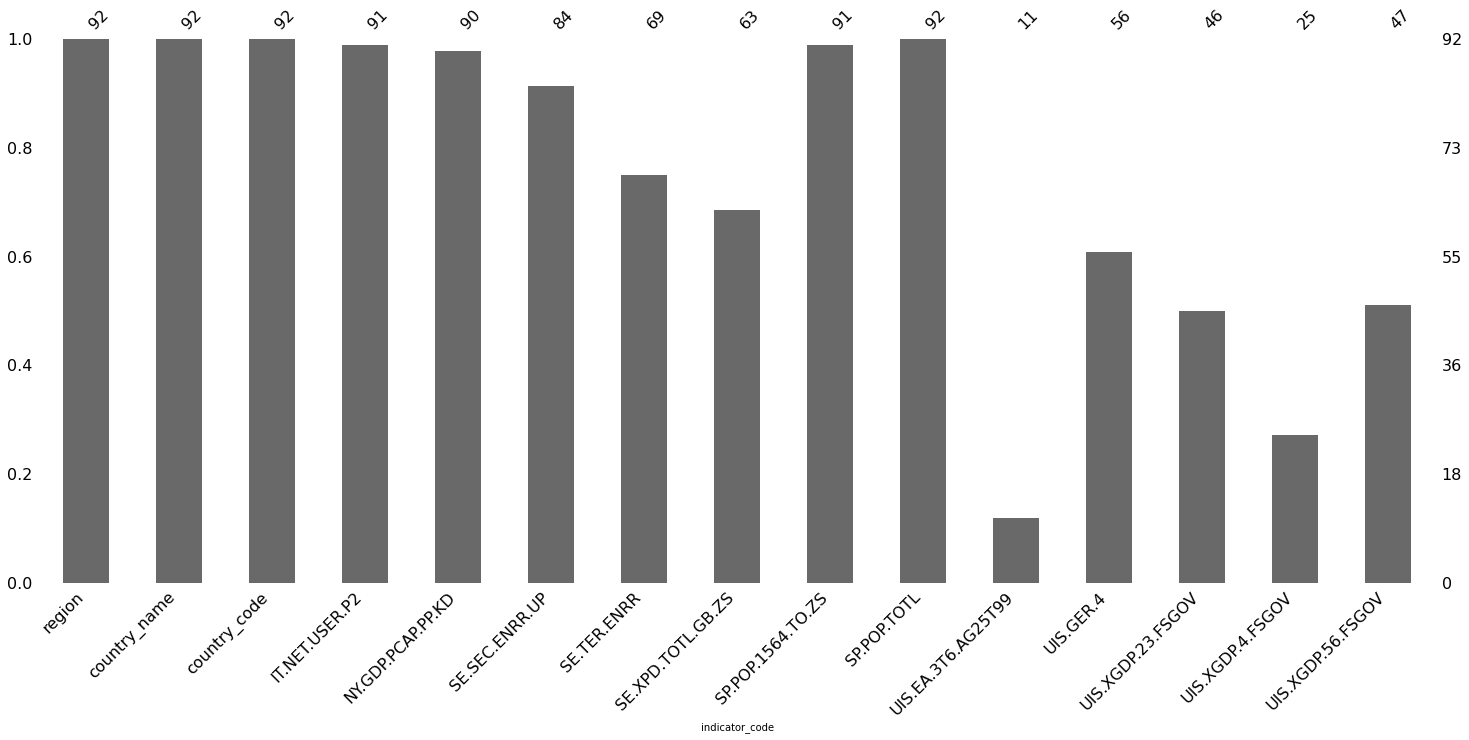

In [44]:
#Visualisons à nouveau les valeurs manquantes de la base
msno.bar(data_pivot);

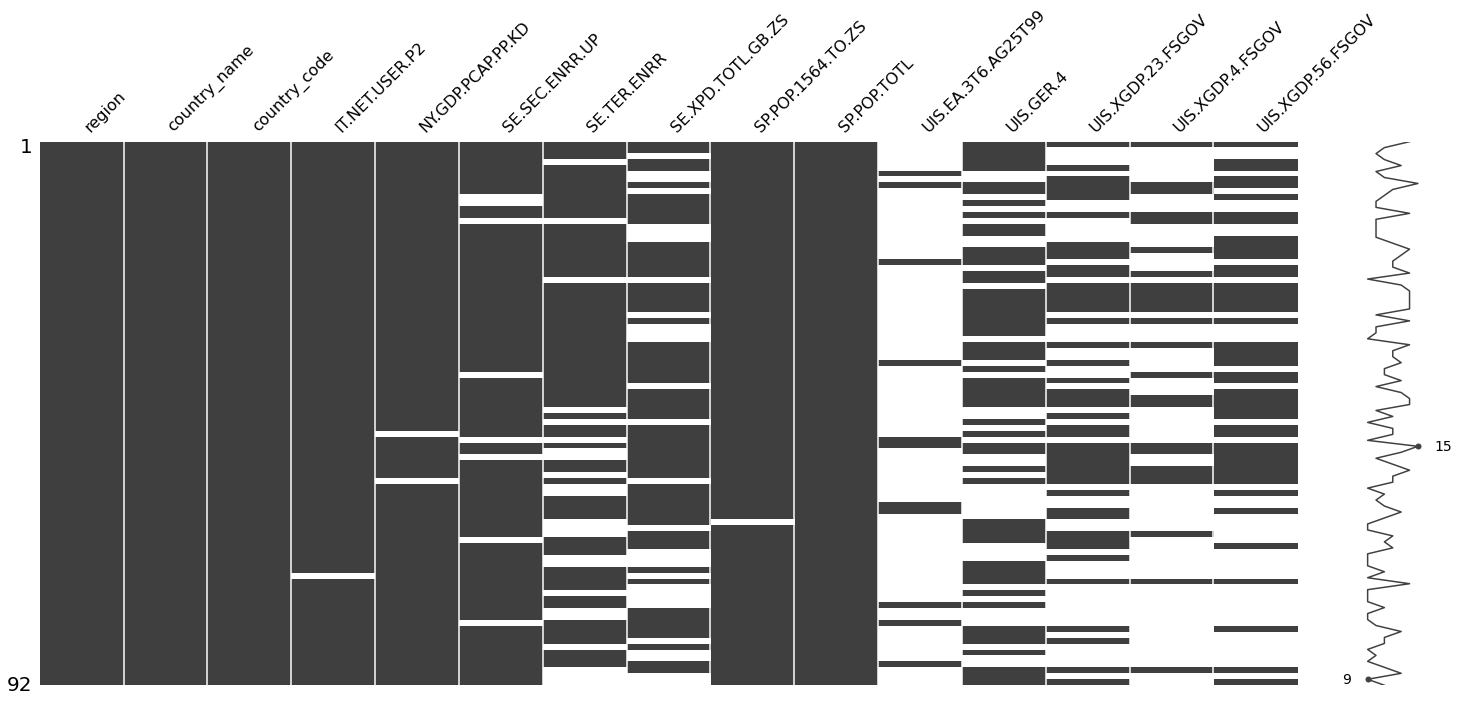

In [45]:
msno.matrix(data_pivot);

### Création de nouvelles variables

Nous avons des variables renseignant sur les depenses du gouvernement, sur les taux de scolarisation. Nous allons en creer une seule variable aggregant toutes ces vriables.

In [46]:
#liste des variables(indicteurs) de data_pivot
indicators = ['IT.NET.USER.P2',  # internet
              "NY.GDP.PCAP.PP.KD", # GDP
              "SP.POP.1564.TO.ZS", # population
              # enrolment
              "SE.SEC.ENRR.UP",
              "SE.TER.ENRR",
              "UIS.GER.4",
              # expenditure
              "SE.XPD.TOTL.GB.ZS",
              "UIS.XGDP.23.FSGOV",
              "UIS.XGDP.4.FSGOV",
              "UIS.XGDP.56.FSGOV",
             ]
len(indicators)

10

In [47]:
# Création de nouvelles variables
# total_enrolment= moyenne des trois taux de scolarisation( secondaire,post-secondaire non-supérieur, supérieur)
# gov_expenditure= somme des dépenses du gouvernement( secondaire,post-secondaire non-supérieur, supérieur)
# Renommer les variables(indicateurs) SE.XPD.TOTL.GB.ZS ; IT.NET.USER.P2 ; NY.GDP.PCAP.PP.KD .
data_pivot = (data_pivot
              .assign(total_enrolment=lambda dframe: dframe[["SE.SEC.ENRR.UP", "SE.TER.ENRR", "UIS.GER.4"]
                                                           ].mean(axis=1),
                      gov_expenditure=lambda dframe: (dframe["UIS.XGDP.23.FSGOV"]
                                                      + dframe["UIS.XGDP.4.FSGOV"]
                                                      + dframe["UIS.XGDP.56.FSGOV"]
                                                     ),
                     )
              .rename(columns={"SE.XPD.TOTL.GB.ZS": "percent_education_total_gov_expenditure",
                               "IT.NET.USER.P2": "internet_users",
                               "NY.GDP.PCAP.PP.KD": "gdp_per_capita"})
             )
data_pivot.head()


indicator_code               region       country_name country_code  \
0               East Asia & Pacific          Australia          AUS   
1               East Asia & Pacific  Brunei Darussalam          BRN   
2               East Asia & Pacific              China          CHN   
3               East Asia & Pacific               Fiji          FJI   
4               East Asia & Pacific              Japan          JPN   

indicator_code  internet_users  gdp_per_capita  SE.SEC.ENRR.UP  SE.TER.ENRR  \
0                    46.756116    35281.395362      249.607498     67.03891   
1                     8.996285    82049.580860       67.462151     12.69113   
2                     1.775913     3700.743648       38.959030      7.72048   
3                     1.496855     6673.847391       59.116379          NaN   
4                    29.990740    33871.843545      100.454224     48.73653   

indicator_code  percent_education_total_gov_expenditure  SP.POP.1564.TO.ZS  \
0                                             13.360160          66.788576   
1                                              8.920740          66.955147   
2                                                   NaN          68.462574   
3                                             20.484921          61.538812   
4                                              9.930410          68.232188   

indicator_code   SP.POP.TOTL  UIS.EA.3T6.AG25T99  UIS.GER.4  \
0               1.915300e+07                 NaN  61.390049   
1               3.332410e+05                 NaN   1.296230   
2               1.262645e+09                 NaN   5.307240   
3               8.112230e+05                 NaN   2.885000   
4               1.268430e+08                 NaN   0.844730   

indicator_code  UIS.XGDP.23.FSGOV  UIS.XGDP.4.FSGOV  UIS.XGDP.56.FSGOV  \
0                         1.88884           0.07649            1.14633   
1                             NaN               NaN                NaN   
2                             NaN               NaN                NaN   
3                             NaN               NaN            0.84457   
4                         1.44606               NaN            0.54858   

indicator_code  total_enrolment  gov_expenditure  
0                    126.012152          3.11166  
1                     27.149837              NaN  
2                     17.328917              NaN  
3                     31.000689              NaN  
4                     50.011828              NaN

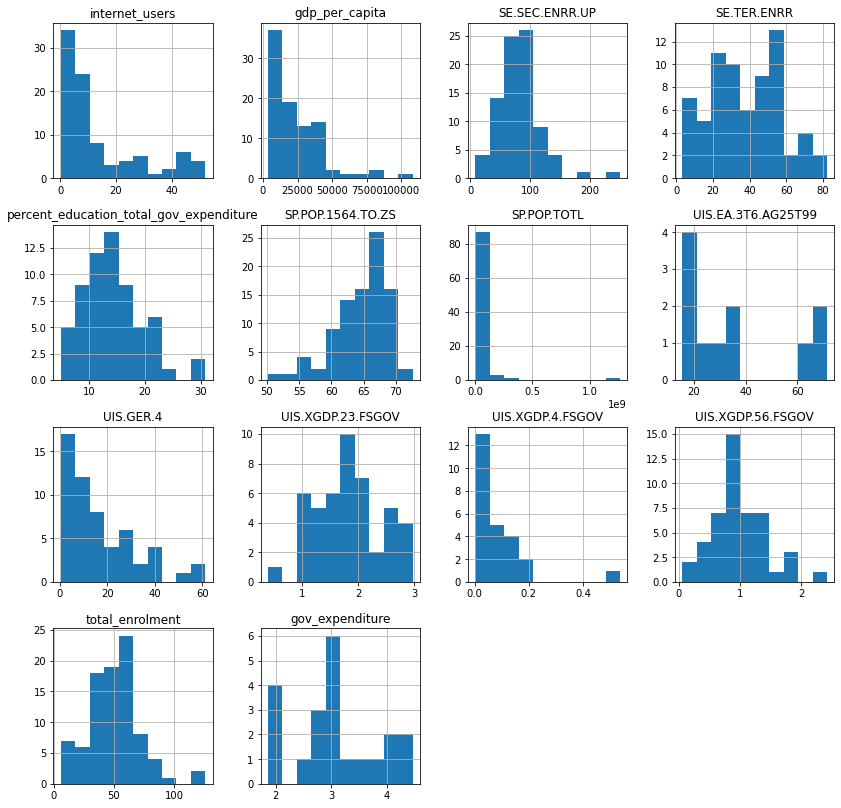

In [48]:
# Grille des Histogrammes
data_pivot.hist(figsize=(14,14))

plt.show()

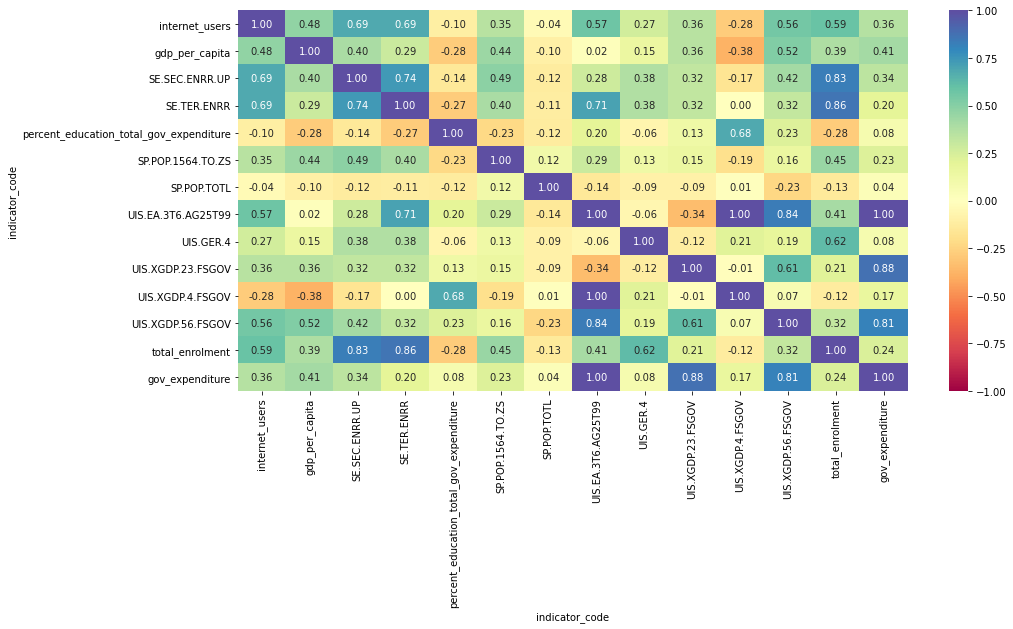

In [49]:
plt.figure(figsize=(15,7))
sns.heatmap(data_pivot.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

## Scoring/ la partie décisionnelle pour l'investissement

Dans cette partie, nous allons construire un score d'attractivité. Celui-ci nous permettra d'ordonner les pays en fonction de leur attractivité en terme d'investissement dans l'éducation.

Pour ce faire nous allons utiliser deux méthodes, la première est une pondération et la deuxième est une analyse en composante principale.

Nous utiliserons par la suite les variables internet, pib par habitant, l'enrollement total et les depenses du gouvernement.

In [50]:
# Ici on s'intéresse aux variables clés : le nombre d'utilisateurs d'internet, le PIB par habitant, 
# le taux moyen de scolarisation et les dépenses totales du gouvernement dans l'éducation(en %).
# La liste des indicateurs pour le score d'attractivité

list_features = ["internet_users",
                 "gdp_per_capita",
                 "total_enrolment",
                 "percent_education_total_gov_expenditure",
                ]

In [51]:
# Définition de la fonction Scoring
def scoring(dframe: pd.DataFrame,  ## the data frame
           features_weight: Dict[str, float] # Dictionnaire des noms des variables et leur importance
           ) -> float:
    """ Country attractivity score
    
    Args:
        dframe (pd.DataFrame): data frame 
    
    Returns:
        float: attractivity score
    
    """
    score = 0
    for col_name, weight in features_weight.items():
        score += weight * dframe[col_name] ## Somme ponderee de leur importance
        
    return score

### Méthode de Pondération

In [52]:
# internet users stats np.arange(0, 1, 0.1) to creat a range of decile frequences values 0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9
internet_stat = data_pivot["internet_users"].describe(percentiles=np.arange(0, 1, 0.1))
internet_stat


count    91.000000
mean     13.456444
std      14.729495
min       0.105046
0%        0.105046
10%       1.496855
20%       2.750740
30%       3.689041
40%       5.800253
50%       6.731396
60%       8.996285
70%      15.110260
80%      23.110874
90%      43.079163
max      52.000000
Name: internet_users, dtype: float64

In [53]:
# filter out all coutries that have internet_users less thant 60% decile
data_f = data_pivot.loc[data_pivot["internet_users"] >= internet_stat.loc["60%"], :].copy()
data_f.country_name.unique()

array(['Australia', 'Japan', 'Korea, Rep.', 'Macao SAR, China',
       'Malaysia', 'New Zealand', 'Austria', 'Belgium', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Italy', 'Luxembourg',
       'Netherlands', 'Norway', 'Portugal', 'Slovak Republic', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'Aruba',
       'Chile', 'Uruguay', 'Israel', 'Malta', 'Canada', 'United States'],
      dtype=object)

In [54]:
print(f'Nous avons desormais une base de shape: {data_f.shape}')

Nous avons desormais une base de shape: (36, 17)


Nous avons affecté des coefficients ou poids aux variables sur la base de la litterature ou selon l'importance de la variable.


In [55]:
# Il s'agit d'affecter des coefficients( poids) à chaque variable en fonction de son importance que nous considerons.
# custom weighted

f_w = {"internet_users": .3,
            "total_enrolment": .3,
            "gdp_per_capita": .3,
            "percent_education_total_gov_expenditure": .1,
           }


data_f = (data_f
               .assign(attractivity_score_custom=
                       lambda dframe: dframe.apply(scoring, features_weight=f_w, axis=1))
               .reset_index()
              )

# et on obtient 
data_f[list_features + ["attractivity_score_custom"]].head()

indicator_code  internet_users  gdp_per_capita  total_enrolment  \
0                    46.756116    35281.395362       126.012152   
1                    29.990740    33871.843545        50.011828   
2                    44.700000    20756.779897        87.160423   
3                    13.608590    42225.415419        42.917110   
4                    21.384731    16309.967988        30.441227   

indicator_code  percent_education_total_gov_expenditure  \
0                                              13.36016   
1                                               9.93041   
2                                                   NaN   
3                                                   NaN   
4                                              21.39068   

indicator_code  attractivity_score_custom  
0                            10637.585105  
1                            10186.546875  
2                                     NaN  
3                                     NaN  
4                             4910.677252

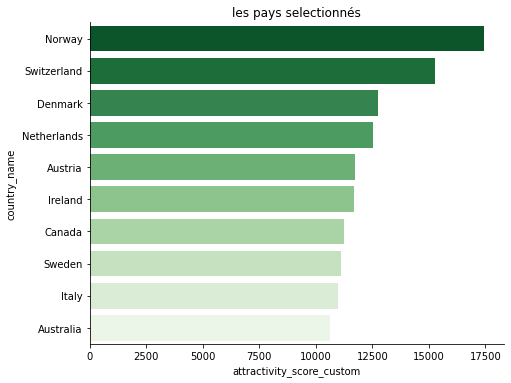

In [56]:

dix_countries = data_f.nlargest(N, columns=["attractivity_score_custom"], keep="all")
g = sns.catplot(data=dix_countries,
                kind="bar", orient="h", hue=None,
                y="country_name", x="attractivity_score_custom", estimator=np.mean,
                height=5, aspect=1.4, palette="Blues_r",
               )
g.ax.set_title("les pays selectionnés");

Ainsi selon les poids affectés suivant cette méthode de pondération  on peut retenir les pays suivants: Norway, Switzerland, le Denmark, Ntherlands, Australia, l'ireland, le canada, Suisse, l'italie. Et le Norway apparait comme le premier pays en terme de qualité et d'attractivité dans le domaine éducatif.

### Méthode Statistique ACP

Dans cette partie nous allons mener une méthode d'analyse en composante principale.

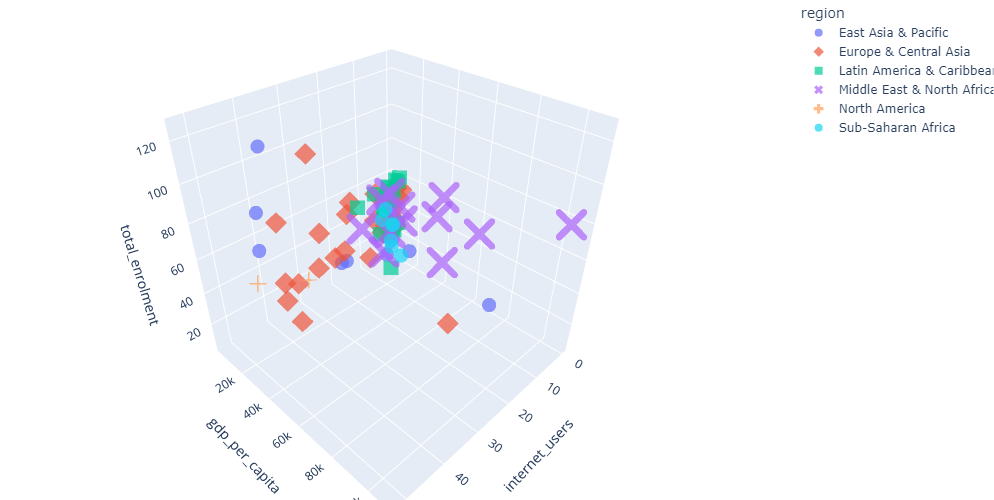

In [57]:
# Visualisation des pays dans le plan des variables (3 indicateurs): 
# Difficile d'interprétation et de décision d'ou l'intéret de l'ACP
fig = px.scatter_3d(data_frame=data_pivot,
                    x="internet_users",
                    y="gdp_per_capita",
                    z='total_enrolment',
                    color='region',
                    hover_name="country_name",
                    symbol='region',
                    opacity=0.7,
                    width=800,
                    height=500,
                   )
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [94]:
# Définition de la fonction fillna( elle permettra d'imputer les valeurs manquantes par la médiane)
#

def fillna_by_group(data, groupby, columns, estimator="median"):
    
    # union permet de combiner plusieurs types
    """ Fill na by group
    
    Args:
        data (pd.DataFrame):
        groupby (Union[str, Sequence[str]]):
        columns (Union[str, Sequence[str]]): 
        estimator (str):
    
    Return:
        pd.DataFrame
    
    """
    return data_pivot[columns].fillna(data_pivot.groupby(groupby)[columns].transform(estimator))

In [95]:
# Imputer les valeurs manquantes: Nous remplaçons les valeurs manquantes par la moyenne des observations
data_pivot[list_features] = fillna_by_group(data=data_pivot,
                                            groupby="region",
                                            columns=list_features,
                                            estimator="median",
                                           )
data_pivot.head()

indicator_code               region       country_name country_code  \
0               East Asia & Pacific          Australia          AUS   
1               East Asia & Pacific  Brunei Darussalam          BRN   
2               East Asia & Pacific              China          CHN   
3               East Asia & Pacific               Fiji          FJI   
4               East Asia & Pacific              Japan          JPN   

indicator_code  internet_users  gdp_per_capita  SE.SEC.ENRR.UP  SE.TER.ENRR  \
0                    46.756116    35281.395362      249.607498     67.03891   
1                     8.996285    82049.580860       67.462151     12.69113   
2                     1.775913     3700.743648       38.959030      7.72048   
3                     1.496855     6673.847391       59.116379          NaN   
4                    29.990740    33871.843545      100.454224     48.73653   

indicator_code  percent_education_total_gov_expenditure  SP.POP.1564.TO.ZS  \
0                                             13.360160          66.788576   
1                                              8.920740          66.955147   
2                                             20.484921          68.462574   
3                                             20.484921          61.538812   
4                                              9.930410          68.232188   

indicator_code   SP.POP.TOTL  UIS.EA.3T6.AG25T99  UIS.GER.4  \
0               1.915300e+07                 NaN  61.390049   
1               3.332410e+05                 NaN   1.296230   
2               1.262645e+09                 NaN   5.307240   
3               8.112230e+05                 NaN   2.885000   
4               1.268430e+08                 NaN   0.844730   

indicator_code  UIS.XGDP.23.FSGOV  UIS.XGDP.4.FSGOV  UIS.XGDP.56.FSGOV  \
0                         1.88884           0.07649            1.14633   
1                             NaN               NaN                NaN   
2                             NaN               NaN                NaN   
3                             NaN               NaN            0.84457   
4                         1.44606               NaN            0.54858   

indicator_code  total_enrolment  gov_expenditure  
0                    126.012152          3.11166  
1                     27.149837              NaN  
2                     17.328917              NaN  
3                     31.000689              NaN  
4                     50.011828              NaN

###  But et objectifs de réaliser l'ACP

L'ACP est une variante des méthode d'analyse factorielle utilisées lorsque les données sont quantitatives( nos indicateurs sont tous quantitatifs). Elle va nous aider à:  
- Repérer les pays qui se ressemblent vis-à-vis des indicateurs et donc de détecter les plus attractifs pour linvestissement
- Relever les différences entre les pays et mettre les atypiques par rapport à l'ensemble des indicateurs
- Retrouver les indicateurs pertinents pour seletionner les pays potentiels
- Décrire les liaisons entre les indicateurs  
 
<font color="blue"> Transformation des données</font>
- Chacune des deux dimensions de  X  permet de définir des distances (ou de proximités) entre les élément définissant l'autre dimension.   
- Les proximités géométriques usuelles entre points-lignes et entre points-colonnes traduisent des associations statistiques soit entre individus, soit entre les variables.
Pour les  n  individus: On définit  $n(n−1)$  distances attachées aux couples de points qui répensentes les individus:
$$d_{(i,j)}=\|\overrightarrow{P_{i}P_{j}}\|=\sum_{k=1}^{k}(x_{ik}-x_{jk})^2$$
Les méthodes sont souvent effectuées sur des données normalisées. Nous devons donc mettre à l'échelle les caractéristiques de nos données. La normalisation des données signifie centrer et reduire les données. Nous utiliseraons le point G centre de gravité pour la transformation.    
Le centrage des données permet de ramener toutes les colonnes de  X  à la même origine,zero:    
$$ x_{ij} \to x_{ij} − \bar{x}_{j} $$  
La réduction des données permet de ramener toutes les variables à une même origine 0 et un même écart-type 1:  
    $$x_{ij} \to \frac{x_{ij}−\bar{x}_{j}}{\sigma_{j}}$$


In [160]:
# Standardisation de la base
scaled_data = pd.DataFrame(MinMaxScaler().fit_transform(data_pivot[list_features]),
                           columns=list_features,
                           index=pd.MultiIndex.from_frame(data_pivot[["region", "country_name", "country_code"]]))
scaled_data

internet_users  \
region              country_name      country_code                   
East Asia & Pacific Australia         AUS                 0.898952   
                    Brunei Darussalam BRN                 0.171331   
                    China             CHN                 0.032197   
                    Fiji              FJI                 0.026820   
                    Japan             JPN                 0.575888   
...                                                            ...   
Sub-Saharan Africa  Equatorial Guinea GNQ                 0.000526   
                    Mauritius         MUS                 0.138289   
                    Namibia           NAM                 0.029669   
                    Seychelles        SYC                 0.140487   
                    South Africa      ZAF                 0.101041   

                                                    gdp_per_capita  \
region              country_name      country_code                   
East Asia & Pacific Australia         AUS                 0.303129   
                    Brunei Darussalam BRN                 0.749327   
                    China             CHN                 0.001830   
                    Fiji              FJI                 0.030196   
                    Japan             JPN                 0.289681   
...                                                            ...   
Sub-Saharan Africa  Equatorial Guinea GNQ                 0.069492   
                    Mauritius         MUS                 0.072206   
                    Namibia           NAM                 0.024779   
                    Seychelles        SYC                 0.142577   
                    South Africa      ZAF                 0.059216   

                                                    total_enrolment  \
region              country_name      country_code                    
East Asia & Pacific Australia         AUS                  1.000000   
                    Brunei Darussalam BRN                  0.179070   
                    China             CHN                  0.097519   
                    Fiji              FJI                  0.211046   
                    Japan             JPN                  0.368910   
...                                                             ...   
Sub-Saharan Africa  Equatorial Guinea GNQ                  0.000954   
                    Mauritius         MUS                  0.281844   
                    Namibia           NAM                  0.088199   
                    Seychelles        SYC                  0.286187   
                    South Africa      ZAF                  0.321362   

                                                    percent_education_total_gov_expenditure  
region              country_name      country_code                                           
East Asia & Pacific Australia         AUS                                          0.325107  
                    Brunei Darussalam BRN                                          0.153203  
                    China             CHN                                          0.600994  
                    Fiji              FJI                                          0.600994  
                    Japan             JPN                                          0.192299  
...                                                                                     ...  
Sub-Saharan Africa  Equatorial Guinea GNQ                                          0.362172  
                    Mauritius         MUS                                          0.362172  
                    Namibia           NAM                                          0.656760  
                    Seychelles        SYC                                          0.362172  
                    South Africa      ZAF                                          0.362172  

[92 rows x 4 columns]

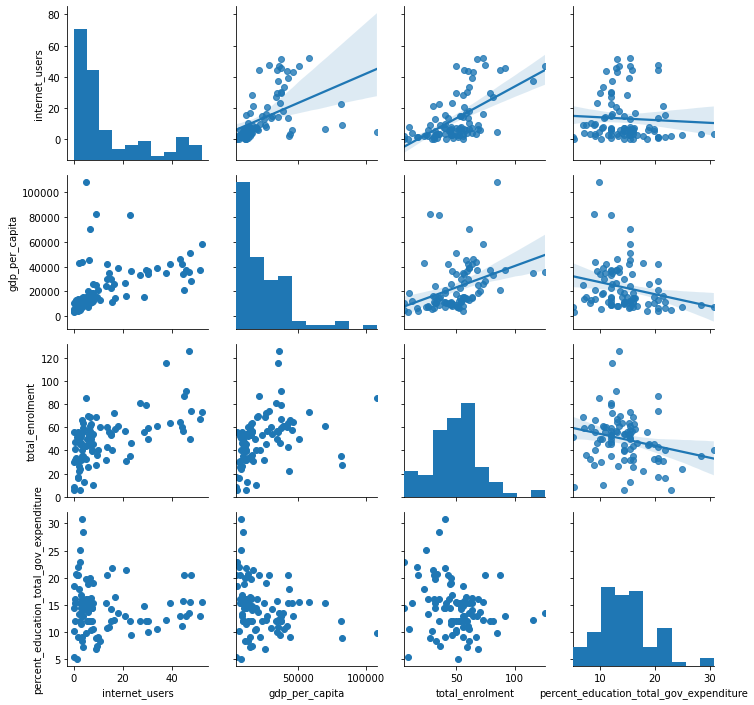

In [161]:
g = sns.PairGrid(data_pivot[list_features])
g.map_upper(sns.regplot) 
g.map_lower(plt.scatter)
g.map_diag(plt.hist)  
plt.show()

l'observation des nuages de points nous indique une tendance lineaire entre les variables. Donc presence de correlations entre les indicateurs. 

Avant de réaliser l'ACP, on doit tester l’intérêt de l’ACP en vérifiant s’il est possible de compresser efficacement l’information disponible. Pour cela, nous allons effectuer le test de sphéricité de Bartlett.
Le test de sphéricité de Bartlett vérifie l’hypothèse nulle selon laquelle toutes les corrélations entre Xj et Xk (avec j différent de k) seraient égales à zéro.
C'est-à-dire, on cherche à tester l’hypothèse suivante:
H0 : R = matrice identité ⇒ c-à-d les variables sont deux à deux indépendantes
Où R est la matrice de corrélation.

Si  H0 est vraie, les variables sont deux à deux orthogonales ⇒ ACP
inutile


In [162]:
# le test de Bartlett.
from scipy.stats import bartlett 
p = scipy.stats.bartlett( scaled_data.internet_users,scaled_data.gdp_per_capita,scaled_data.total_enrolment,scaled_data.percent_education_total_gov_expenditure)
p

BartlettResult(statistic=32.704415217275425, pvalue=3.7178129709993507e-07)

Ici, la pvalue est très inférieure aux seuils usuels( 1%, 5%, 10%). Donc on rejette l'hypothèse nulle.  

In [163]:
# Application de l'ACP sur nos variables
# from fanalysis.pca import PCA 
pca = PCA(n_components=None) 
pca.fit(scaled_data)   
explain_var_ratio = pca.explained_variance_ratio_
explain_var_ratio

array([0.59491999, 0.20313471, 0.11460959, 0.08733571])

Le premier axe contribue a lui seul 60% de l'inertie totale et le deuxieme axe 20%.

In [164]:
pca.components_

array([[ 0.83662436,  0.3611528 ,  0.39598317, -0.11325045],
       [ 0.31928986, -0.29687076, -0.15004695,  0.88735993],
       [-0.1591248 ,  0.86816556, -0.37426353,  0.28441988],
       [-0.41568372,  0.16650817,  0.82499094,  0.34477822]])

In [165]:
# weighted: Variance expliquée de chaque axe multipliée par la coordonnée de chaque variable sur l'axe correspondant
weighted = (np.multiply(explain_var_ratio.reshape(1, -1).T, pca.components_)).sum(axis=0)
# normalized weight: la somme des poids doit etre égale à  1
normalize_weighted =  (weighted / sum(weighted)).round(2)
features_weight_stat = dict(zip(list_features, normalize_weighted))

features_weight_stat

{'internet_users': 0.43,
 'gdp_per_capita': 0.23,
 'total_enrolment': 0.2,
 'percent_education_total_gov_expenditure': 0.15}

Ainsi nous obtenons les poids pour chaque variable calcules a partir de la variance de chaque axe et les coordonnees sur l'axe. La variable internet_users vient en tete suivie du PIB par habitant.

In [166]:
# Calcul de l'attractivité pour selectionner les pays
scaled_data = (scaled_data
               .assign(score=
                       lambda dframe: dframe.apply(scoring, features_weight=features_weight_stat, axis=1))
               .reset_index()
              )
scaled_data

region       country_name country_code  internet_users  \
0   East Asia & Pacific          Australia          AUS        0.898952   
1   East Asia & Pacific  Brunei Darussalam          BRN        0.171331   
2   East Asia & Pacific              China          CHN        0.032197   
3   East Asia & Pacific               Fiji          FJI        0.026820   
4   East Asia & Pacific              Japan          JPN        0.575888   
..                  ...                ...          ...             ...   
87   Sub-Saharan Africa  Equatorial Guinea          GNQ        0.000526   
88   Sub-Saharan Africa          Mauritius          MUS        0.138289   
89   Sub-Saharan Africa            Namibia          NAM        0.029669   
90   Sub-Saharan Africa         Seychelles          SYC        0.140487   
91   Sub-Saharan Africa       South Africa          ZAF        0.101041   

    gdp_per_capita  total_enrolment  percent_education_total_gov_expenditure  \
0         0.303129         1.000000                                 0.325107   
1         0.749327         0.179070                                 0.153203   
2         0.001830         0.097519                                 0.600994   
3         0.030196         0.211046                                 0.600994   
4         0.289681         0.368910                                 0.192299   
..             ...              ...                                      ...   
87        0.069492         0.000954                                 0.362172   
88        0.072206         0.281844                                 0.362172   
89        0.024779         0.088199                                 0.656760   
90        0.142577         0.286187                                 0.362172   
91        0.059216         0.321362                                 0.362172   

       score  
0   0.705035  
1   0.304812  
2   0.123919  
3   0.150836  
4   0.416886  
..       ...  
87  0.070726  
88  0.186766  
89  0.134611  
90  0.204765  
91  0.175665  

[92 rows x 8 columns]

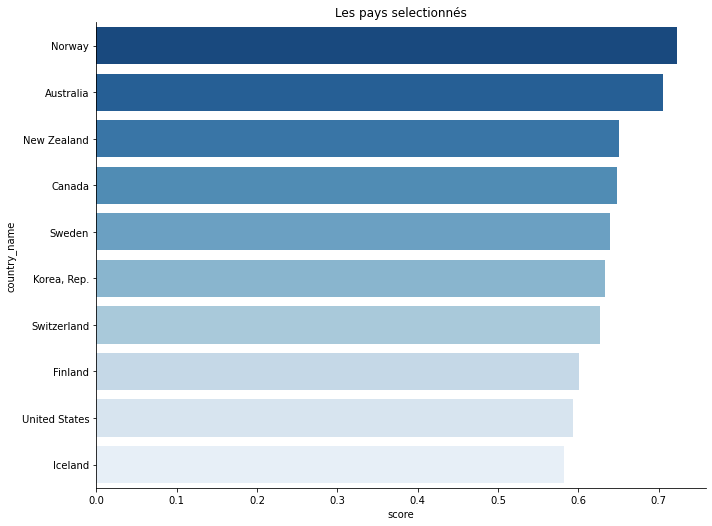

In [167]:
# Top 10 des pays potentiels 
top_country = scaled_data.nlargest(N, columns=["score"], keep="all")
g = sns.catplot(data=top_country,
                kind="bar", orient="h", 
                y="country_name", x="score", estimator=np.mean,
                height=7, aspect=1.4, palette="Blues_r",
               )
g.ax.set_title("Les pays selectionnés") ;



Ainsi en utilisant les ponderations issu de l'analyse factorielle l'on peut retenir les pays suivants: Norway, Switzerland, le Denmark, Ntherlands, Australia, l'ireland, le canada, Suisse, l'italie. Et le Norway apparait comme le premier pays en terme de qualité et d'attractivité dans le domaine éducatif.

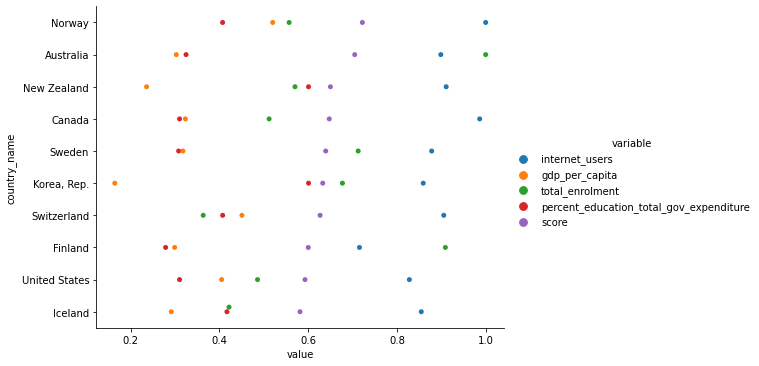

In [168]:
(pd.melt(top_country,
        id_vars=["country_name", "region"],
        value_vars=list_features + ["score"],
        var_name=None,
        value_name='value',)
 .pipe((sns.catplot, "data"), kind="swarm",
       y="country_name", x="value", hue="variable", height=5, aspect=1.5
      )
);

A travers ce graphique, il est clair que les pays ayant un score élevé ont été plus tirés par leur taux d'utilisation d'internet qui est assez élevé. En plus ces pays affichent des élevées pour toutes les variables.

In [178]:
# top of region
scaled_data.groupby("region").score.mean().nlargest(n=6)

region
North America                 0.620367
East Asia & Pacific           0.366177
Europe & Central Asia         0.332619
Middle East & North Africa    0.240436
Latin America & Caribbean     0.197159
Sub-Saharan Africa            0.130659
Name: score, dtype: float64

In [170]:
scaled_data

region       country_name country_code  internet_users  \
0   East Asia & Pacific          Australia          AUS        0.898952   
1   East Asia & Pacific  Brunei Darussalam          BRN        0.171331   
2   East Asia & Pacific              China          CHN        0.032197   
3   East Asia & Pacific               Fiji          FJI        0.026820   
4   East Asia & Pacific              Japan          JPN        0.575888   
..                  ...                ...          ...             ...   
87   Sub-Saharan Africa  Equatorial Guinea          GNQ        0.000526   
88   Sub-Saharan Africa          Mauritius          MUS        0.138289   
89   Sub-Saharan Africa            Namibia          NAM        0.029669   
90   Sub-Saharan Africa         Seychelles          SYC        0.140487   
91   Sub-Saharan Africa       South Africa          ZAF        0.101041   

    gdp_per_capita  total_enrolment  percent_education_total_gov_expenditure  \
0         0.303129         1.000000                                 0.325107   
1         0.749327         0.179070                                 0.153203   
2         0.001830         0.097519                                 0.600994   
3         0.030196         0.211046                                 0.600994   
4         0.289681         0.368910                                 0.192299   
..             ...              ...                                      ...   
87        0.069492         0.000954                                 0.362172   
88        0.072206         0.281844                                 0.362172   
89        0.024779         0.088199                                 0.656760   
90        0.142577         0.286187                                 0.362172   
91        0.059216         0.321362                                 0.362172   

       score  
0   0.705035  
1   0.304812  
2   0.123919  
3   0.150836  
4   0.416886  
..       ...  
87  0.070726  
88  0.186766  
89  0.134611  
90  0.204765  
91  0.175665  

[92 rows x 8 columns]

Selon les régions, l'on doit opérer prioritairement dans les régions de l'Amerique du Nord, Asie de l'Est et Pacifique, l'Europe et l'Asie centrale,...

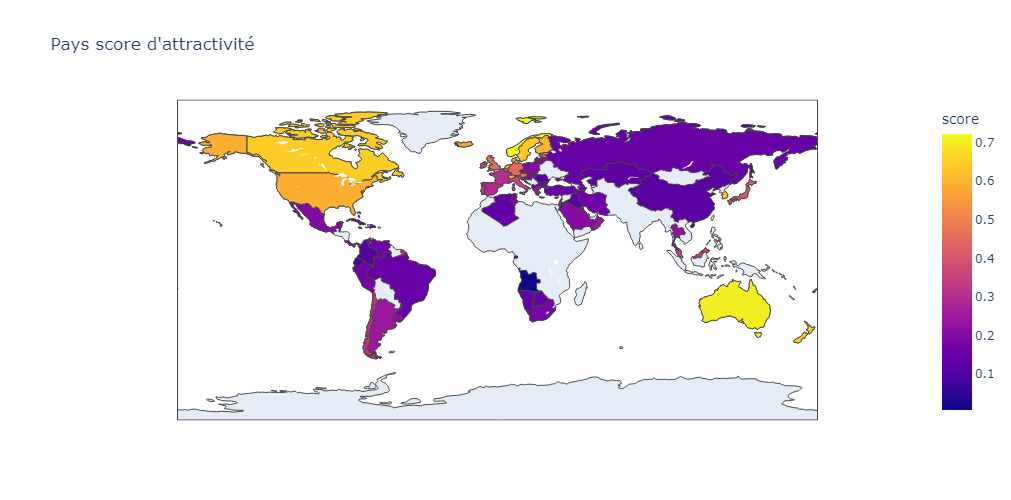

In [175]:
fig= px.choropleth(scaled_data.reset_index(),               
              locations="country_code",               
              color="score",
              # hover_name="country_name",
              hover_data=["region", "country_name"],
              animation_frame=None,    
              color_continuous_scale='Plasma',  
              height=500,
              width=None,
              title="Pays score d'attractivité",
              #range_color=(0, 12),
)
fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3795: UserWarning:

Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.



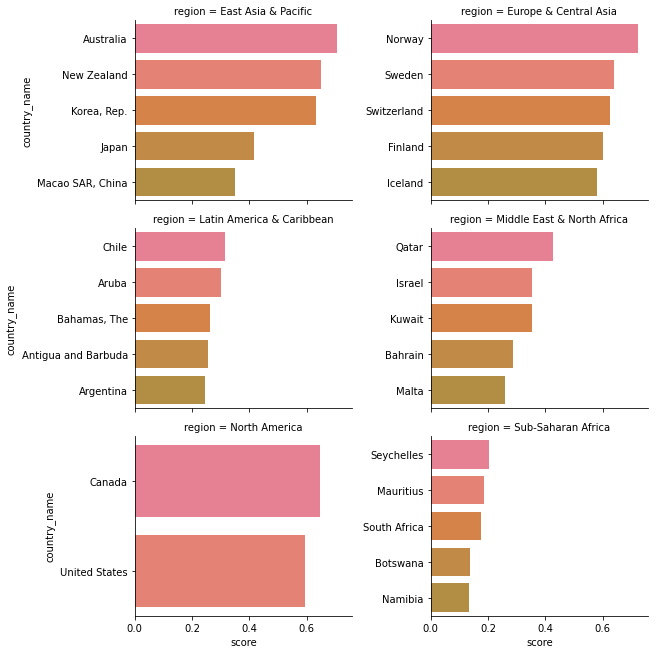

In [159]:
#!pip install -U kaleido
#Top 5 des pays par region
g = (scaled_data.groupby("region", as_index=False)
     .apply(lambda g: g.nlargest(5, columns=["score"], keep="all"))
     .pipe((sns.catplot, "data"), 
           kind="bar", orient="h", col="region", col_wrap=2,
           y="country_name", x="score", estimator=np.mean,
           height=3, aspect=1.5, palette="husl", sharey=False
          )
    )

Nous avons les pays potentiels  par région: Par exemple en Amérique du Nord: On retient Les USA et le Canada; en Afrique subsaharienne Nous avons Seychelles, le Mauritius, l'Afrique du Sud, Botswana et Namibie,...

 <center> <font, color = "violet"> Conclusion </font> </center>

Décision:

En termes d'investissement dans le domaine de l'éducation, les pays suivants peuvent etre retenus selon les deux méthodes.
- Méthode de pondération: Norvège, Suisse, Danemark, Pays-Bas, Autriche, Irlande, Canada, Suède, Italie et Australie. 

- Méthode de l'ACP: Norvège, Autriche, Nouvelle-Zélande, Canada, Suède, Corée, Suisse, Finlande, États-Unis, Islande.

Nous retenons les pays fournis par la deuxième méthode qui est plus efficace car méthode statistique au lieu de la première qui est une affectation de coeficients selon l'importance que nous accordons à chaque variable.

Donc les pays les plus attractifs sont prioritairement: Norvège, Autriche, Nouvelle-Zélande, Canada, Suède, Corée, Suisse, Finlande, États-Unis, Island.

Apport: 

Ce travail nous  a permis d'aborder plusieurs méthodes du cours(Traitement, Visualisation, description,...). La finalisation de ce projet nous a montré de nombreux défis notamment sur le plan de traitement des données et aussi décisionnel.  Il nous a permis de pouvoir guider une entreprise dans son projet d'expansion à l'international dans le domaine éducatif
Aussi, nous avons pu obtenir  les pays potentiels par ordre de priorité en terme d'invesrtissement. 

Limites:

En matière d'investissement, la prevision sur de long terme de l'évolution du marché est necessaire. Il serait intéressant de connaitre la dynamique des indicateurs pour chacun de ces pays. Par exemple un pays émergent non considéré peut se retrouver favorable à l'investissement ( horizon 5 ou 10 ans).

